# 3. Analysis of Data

## Utilised Packages

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn import metrics
from sklearn import svm
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import nltk
import datetime as dt
import pandas_datareader.data as web
import matplotlib.pyplot as plt
nltk.download("stopwords")
style.use("ggplot")

[nltk_data] Downloading package stopwords to /Users/alex/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Sentiment Analysis
After cleaning the dataset, a sentiment analysis was conducted. With the Sentiment Analysis we get an overview of the general sentiment of the dataset, and we generate a sentiment score which we use as a basis to classify each tweet.

In [2]:
#%% Import and clean data to run Sentiment Analysis
import csv
processedlist=[]
with open("/Users/alex/Documents/UvA/Masters/BigData/Big Data Project/twitter_metadata/export_dataframe.csv", encoding="utf-8",mode="r",newline="") as fi: 
    reader=csv.reader(fi,delimiter="\t")
    next(reader)
    for row in reader:
        tweet=row[0]
        tweet_processed=tweet.lower().replace("!"," ").replace("."," ").replace("?"," ").replace("’"," ").replace('"'," ").replace("#"," ").replace(":"," ")
        processedlist.append(tweet_processed)

processedlist = [w[22:] for w in processedlist]
print(processedlist)

["of the @colourpopco  disney  midnightmasqurade and the @jeffreestar @shanedawson  conspiracypaletteto ma\\xe2\\x80\\xa6 https //t co/dbxrixhjet'", " &gt;  disney \\nchange my mind '", "hen we head back to the office   lockdown  bobafett  starwars  disney @ key west video inc  - corporate\\xe2\\x80\\xa6 https //t co/szjqp7gzlx'", "music   disney'", "anart of @snitchery cosplay of esmeralda from  disney\\'s   the hunchback of norte dame  \\n\\n art  artwork\\xe2\\x80\\xa6 https //t co/oux17jz7kn' ", "ive led light up plush teddy bear  toyplanet  disney  doll  art  toys4life  fun  collection  figure\\xe2\\x80\\xa6 https //t co/2ctukhj8qj' ", "tired yet sooooo time for some  disney \\n\\xf0\\x9f\\x8e\\xac\\xf0\\x9f\\x8e\\xac\\xf0\\x9f\\x8e\\xac\\xe2\\x9d\\xa4\\xe2\\x9d\\xa4\\xe2\\x9d\\xa4\\xf0\\x9f\\x92\\x99\\xf0\\x9f\\x92\\x99\\xf0\\x9f\\x92\\x99'", "y @disneyland @disneyparks \\ni just want the scoop on pickles  make magic happen   \\n disney  disneyland\\xc2\\xa0\\xe2\\x80\\xa6 https 

In [3]:
#%% Sentiment Analysis
positivelist=open("/Users/alex/Documents/UvA/Masters/BigData/Exercises/positive.txt").read(). splitlines() #Load positive and negative dictionaries
negativelist=open("/Users/alex/Documents/UvA/Masters/BigData/Exercises/negative.txt").read(). splitlines()

negcountlist=[]
poscountlist=[]
sentilist=[]

for tweet in processedlist:
    poscount=0
    negcount=0
    print ("Analyzing this one:",tweet)
    
    for word in tweet.split(): 
        if word in positivelist:
            poscount+=1
        elif word in negativelist:
            negcount+=1
            
    print("It contains",poscount,"positive words and",negcount,"negative words.")
    poscountlist.append(poscount) 
    negcountlist.append(negcount) 
    sentilist.append((poscount-negcount)/len(tweet.split()))

Analyzing this one: of the @colourpopco  disney  midnightmasqurade and the @jeffreestar @shanedawson  conspiracypaletteto ma\xe2\x80\xa6 https //t co/dbxrixhjet'
It contains 0 positive words and 0 negative words.
Analyzing this one:  &gt;  disney \nchange my mind '
It contains 0 positive words and 0 negative words.
Analyzing this one: hen we head back to the office   lockdown  bobafett  starwars  disney @ key west video inc  - corporate\xe2\x80\xa6 https //t co/szjqp7gzlx'
It contains 0 positive words and 0 negative words.
Analyzing this one: music   disney'
It contains 0 positive words and 0 negative words.
Analyzing this one: anart of @snitchery cosplay of esmeralda from  disney\'s   the hunchback of norte dame  \n\n art  artwork\xe2\x80\xa6 https //t co/oux17jz7kn' 
It contains 0 positive words and 0 negative words.
Analyzing this one: ive led light up plush teddy bear  toyplanet  disney  doll  art  toys4life  fun  collection  figure\xe2\x80\xa6 https //t co/2ctukhj8qj' 
It contains

It contains 0 positive words and 0 negative words.
Analyzing this one: isney minnie mouse figurine holding flower basket 11 inch  disney https //t co/yxbyqmuk6t via @ebay'
It contains 0 positive words and 0 negative words.
Analyzing this one: isney+ is working on a live-action series with  atlantisadaptation based on  atlantis  the  lostempire \xe2\x80\xa6 https //t co/w63aqhlxvg'
It contains 0 positive words and 0 negative words.
Analyzing this one: sia, pizza ponte and vivoli il gelato set to open at disney springs on may 22nd, 2020 with 'dine safe' pr\xe2\x80\xa6 https //t co/qtvjc1bxjv   
It contains 1 positive words and 0 negative words.
Analyzing this one: disney theme park reopened on monday  take a look at the social distancing &amp; cleanliness protocols they\xe2\x80\xa6 https //t co/ewpdns3eut'
It contains 1 positive words and 0 negative words.
Analyzing this one:  \nnew sealed clue disney the haunted mansion edition board game in collectible tin\xe2\x80\xa6 https //t co/pg0u

It contains 0 positive words and 0 negative words.
Analyzing this one:  song and video is a proof that everything will be ok  \xe2\x9d\xa4  disneymagicmoments  olaf @joshgad  disney https //t co/ixgjx6nutf'
It contains 1 positive words and 0 negative words.
Analyzing this one: ved a jasmine sticker my sister put on the wall of our childhood room about 27 years ago so it can be re\xe2\x80\xa6 https //t co/8y19fcwyoe'
It contains 0 positive words and 0 negative words.
Analyzing this one: nd background on a simple pencil sketch   art  artist  coloring  disney  jessicarabbit https //t co/7q2uujnnba'
It contains 1 positive words and 0 negative words.
Analyzing this one: 92\x9a\xf0\x9f\x92\x99\xe2\x9d\xa4\xef\xb8\x8fhuey, dewey and louie  they are sooo funny   \xe2\x9d\xa4\xef\xb8\x8f\xf0\x9f\x92\x99\xf0\x9f\x92\x9a  ducktales  hueydeweylouie  \xe3\x83\x92\xe3\x83\xa5\xe3\x83\xbc\xe3\x82\xa4  \xe3\x83\x87\xe3\x83\xa5\xe3\x83\xbc\xe3\x82\xa4  \xe3\x83\xab\xe3\x83\xbc\xe3\x82\xa4   dlp  disney

It contains 1 positive words and 1 negative words.
Analyzing this one: look at the  disney classic  sleepingbeauty\n\nhttps //t co/rwjxfwl7m2  \n\n @_bumwine  @kapn_krude  \xe2\x80\xa6 https //t co/ey0e5lirru'
It contains 1 positive words and 0 negative words.
Analyzing this one:  canvas for my little niece for her birthday from start to finish  canvas  art  disney  toystory\xe2\x80\xa6 https //t co/qzkcdiv93l'
It contains 0 positive words and 1 negative words.
Analyzing this one: d guy  duh   edit  billieeilish @billieeilish  peakyblinders   killbill  tarantino  americanpsycho\xe2\x80\xa6 https //t co/d7xjffjlbh   
It contains 0 positive words and 0 negative words.
Analyzing this one: s film is getting the love it deserves  disney https //t co/ohnntiyvui'
It contains 1 positive words and 0 negative words.
Analyzing this one: 9coh, yeah about lori and i   \xe2\x80\x9d\n\n onward  onwardpixar  disney  wednesdayfanart https //t co/hl1tqymrxz' 
It contains 1 positive words and 0 negative 

It contains 2 positive words and 0 negative words.
Analyzing this one: and paris parade performers past and present bring you the wonderful world of disney parade lockdown dow\xe2\x80\xa6 https //t co/tmvsamvco1'
It contains 1 positive words and 0 negative words.
Analyzing this one: he  disney+ show - forky asks a question by kristina on @themouseforless https //t co/vcvxz1qch8'
It contains 0 positive words and 0 negative words.
Analyzing this one: tter universe  @magicourway show  321 is up   disney &amp;  neworleans  port orleans resort french quarter i\xe2\x80\xa6 https //t co/hfebd5cjek'
It contains 0 positive words and 0 negative words.
Analyzing this one: just the top 4 scenes in the movies we've scored so far  (jokes on y'all we've only scored four movies oo\xe2\x80\xa6 https //t co/2gthqon3ty   
It contains 2 positive words and 0 negative words.
Analyzing this one: 98the new mutants\xe2\x80\x99 ron\xe2\x80\x99s gone wrong  has got a new release date from disney, finally  https 

It contains 1 positive words and 0 negative words.
Analyzing this one: d skeeter are coming back to muppet babies  yes, i'm a grown man tweeting about muppet babies   muppets\xe2\x80\xa6 https //t co/fpv7q23ufh   
It contains 0 positive words and 0 negative words.
Analyzing this one: y exciting delivery today \n\n magicaldayapparel  disney  disneyclothes  florida  hiddenmickey https //t co/pzhgm4iksq'
It contains 1 positive words and 0 negative words.
Analyzing this one: wadays and your fire breathing dragons  back in my day     disney https //t co/j44vew70al'
It contains 0 positive words and 1 negative words.
Analyzing this one: ant adventure in the great wide somewhere  seriously  what day is it  in the meantime  stayhome\xe2\x80\xa6 https //t co/gavgkwdjhj'
It contains 3 positive words and 1 negative words.
Analyzing this one: 0\x9f\xa7\x9c\xe2\x80\x8d\xe2\x99\x80\xef\xb8\x8f\xf0\x9f\xa6\x80\xf0\x9f\x90\xa0\xf0\x9f\x8c\x85 1/6 of  sixfanarts and a nice little  mermay2020 piece \xf0\

It contains 0 positive words and 0 negative words.
Analyzing this one: aby yoda plush the child mandalorian star wars 11 inch mattel disney  disney https //t co/lorurl1o0g via @ebay'
It contains 2 positive words and 0 negative words.
Analyzing this one:  exist  maybe someone wishes it away   newmutants  disney  fox https //t co/cn3asuvyqp https //t co/7cr0mlqx5j'
It contains 1 positive words and 0 negative words.
Analyzing this one: sney should have had a bunch of shows on deck and ready to go by the time they launched  all i am readin\xe2\x80\xa6 https //t co/bvpxuh8lbr'
It contains 1 positive words and 0 negative words.
Analyzing this one:  head at at wheres your head at \n\n nostalgia  playstation  skateboarding  disney https //t co/obktstozqq'
It contains 0 positive words and 0 negative words.
Analyzing this one: o i walked into theater 1 at @chinesetheatres as i watched the premiere of my teen drama, the toy soldier\xe2\x80\xa6 https //t co/dx3am76sot' 
It contains 0 positive word

It contains 1 positive words and 0 negative words.
Analyzing this one: cmoments  learn the  aulani hula - https //t co/hcygovbtiq  disney  disneyparksblog  news https //t co/9ryxfyt3o0'
It contains 0 positive words and 0 negative words.
Analyzing this one: to my amazing cousin, jennie, for making us some masks  she even made  disney ones for us  https //t co/nxr7oechct' 
It contains 2 positive words and 0 negative words.
Analyzing this one: st melted away \xf0\x9f\xa5\xba  disney https //t co/alwn53dyna'
It contains 0 positive words and 0 negative words.
Analyzing this one: 0\x9f\x8e\xa1\xf0\x9f\x8e\xa2\xf0\x9f\x8f\xb0\xf0\x9f\x90\xad  disney  eua  usa em disney's magic kingdom https //t co/zl8pwbycws   
It contains 1 positive words and 0 negative words.
Analyzing this one: to  digitaltvresearch, subscription  streaming will grow its base by 81% from 2019 - 2025, reaching aroun\xe2\x80\xa6 https //t co/btpyi23kbu' 
It contains 1 positive words and 0 negative words.
Analyzing this one: 

It contains 1 positive words and 0 negative words.
Analyzing this one:  repair service work we did \nhttps //t co/hwe9rxqb0z  rv  repair  mobile  campingworld\n campingmagazine\xe2\x80\xa6 https //t co/ukhegchytj'
It contains 2 positive words and 0 negative words.
Analyzing this one: ars new yay  \nhttps //t co/hjtihxv4sd\n starwars  jedi  sith  lucasfilms  disney  podcast  nerdwithacause https //t co/lsgk9tcrca'
It contains 0 positive words and 0 negative words.
Analyzing this one: returns with new  characters &amp; a lot of adventures  engage your child in magical crafts &amp; coloring activ\xe2\x80\xa6 https //t co/3ikbvtiq4b'
It contains 1 positive words and 0 negative words.
Analyzing this one: creates magical lego disneyland replica in quarantine  https //t co/tag0rizncb\n\n disneyland\xe2\x80\xa6 https //t co/ch9sgfx94o'
It contains 1 positive words and 0 negative words.
Analyzing this one: liver &amp; company ragtag team, minus oliver but still  ;w;\n\n disneyinreallife  disney

It contains 0 positive words and 0 negative words.
Analyzing this one: s \xf0\x9f\x90\xad\n \n \n \n \n \n tommyxlewis  lewishamilton  teamlh  tommyhilfiger  tommyjeans  disney  disneylandparis\xe2\x80\xa6 https //t co/rrjeiuvihf'
It contains 0 positive words and 0 negative words.
Analyzing this one: ur of the day  @disneyparks pandora, the world of avatar\n\nwhy is this virtual tour awesome  it's free and\xe2\x80\xa6 https //t co/k0tirtheas   
It contains 2 positive words and 0 negative words.
Analyzing this one: d haunted mansion masterpiece materializes  https //t co/skf4skehsx\n\n hauntedmansion  disneyathome\xe2\x80\xa6 https //t co/n5lf0qhiu0'
It contains 1 positive words and 0 negative words.
Analyzing this one: hday to fantasmic, which debuted in  disneyland on this day in 1992 \nthe show costs appx $75,000 per run    disney' 
It contains 0 positive words and 0 negative words.
Analyzing this one: is kind of comedy on tv  disney \'s  dinosaurs \xf0\x9f\x98\x82\xf0\x9f\x91\x8c\xf

It contains 0 positive words and 0 negative words.
Analyzing this one: ozen magiclip flip 'n switch castle with  anna  doll https //t co/r1ep5y50tw https //t co/qxavu76bfz   
It contains 0 positive words and 0 negative words.
Analyzing this one: s elsa oc\nwhat do you think  \nedit by  me \noc by  my cousin \nfrozen  elsa \n frozen2  disney  elsa\xe2\x80\xa6 https //t co/xngwptfrq7   
It contains 0 positive words and 0 negative words.
Analyzing this one: nna \xe2\x9b\x84\xef\xb8\x8f\n\n anna  frozen  disney  disneyprincess https //t co/v3ryfvyltt'
It contains 0 positive words and 1 negative words.
Analyzing this one: uthentic disney parks glow with the show lighted ears mickey mouse hat  disney https //t co/jykvjl6tgc via @ebay   js1020'
It contains 0 positive words and 0 negative words.
Analyzing this one: oy  3 \nwip 50% \n\n disney  twistedwonderland   twisted_wonderland  ruggie_bucchi https //t co/l8w5go7dax'
It contains 0 positive words and 0 negative words.
Analyzing this one: x9

It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/4rgk0gwkuq   
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/gtv9dmvvgl   
It contains 0 positive words and 0 negative words.
Analyzing this one: uthentic disney parks glow with the show lighted ears mickey mouse hat  disney https //t co/spi3cts5pg via @ebay'
It contains 0 positive words and 0 negative words.
Analyzing this one: erness surprises - @wdwmagazine https //t co/pob8fot1qf  disney  wdw'
It contains 0 positive words and 0 negative words.
Analyzing this one: sical hamilton is coming soon to disney plus july 3rd - a whole year early   disneyplus\xe2\x80\xa6 https //t co/b2vrmolqat'
It contains 0 positive words and 0 negative word

It contains 0 positive words and 0 negative words.
Analyzing this one: fishtv so even @disney's given-up trying to make sense of  disney @starwars   starwars   
It contains 2 positive words and 1 negative words.
Analyzing this one: lover @remydushine @enterhacker @matthewkadish @doomcock @nerdrotics @thatstarwarsgrl @rianjohnson\xe2\x80\xa6 https //t co/omrgrgtppb'
It contains 1 positive words and 0 negative words.
Analyzing this one: t for @juanpadraws  \xf0\x9f\x92\x99  disney  pixar  insideout  insideoutsadness  sadness https //t co/jagqtpij9e'
It contains 0 positive words and 1 negative words.
Analyzing this one: s    disney  artistontwitter  fanart https //t co/a6tn6prwny'
It contains 0 positive words and 0 negative words.
Analyzing this one: lot- 16 unique disney magnets  goofy, tigger,mickey&amp;more- look     disney https //t co/eelmy0dqr2 via\xe2\x80\xa6 https //t co/y5gl907m0m' 
It contains 1 positive words and 0 negative words.
Analyzing this one:   garrymarshall special but

It contains 0 positive words and 0 negative words.
Analyzing this one: gsw66 if you are a fan of  lukeskywalker it's hard to enjoy these new  disney  starwars sequels \xe2\x80\xa6 https //t co/sh1x1hz84f   
It contains 0 positive words and 1 negative words.
Analyzing this one: ey question  episode 5 is in the works   email dishinitpodcast@gmail com and be featured on a upcoming p\xe2\x80\xa6 https //t co/slamhusfek'
It contains 0 positive words and 0 negative words.
Analyzing this one: pisode 2  one of my favorites happily ever after   we could all use some disney magic right now   give u\xe2\x80\xa6 https //t co/ocmczdmk0b'
It contains 3 positive words and 0 negative words.
Analyzing this one: ozziebear \nmore smiles    \xc2\xb0\xe2\x97\x8b\xc2\xb0 \xc2\xb0\xe2\x97\x8b\xc2\xb0 \xc2\xb0\xe2\x97\x8b\xc2\xb0 \xc2\xb0\xe2\x97\x8b\xc2\xb0 \xc2\xb0\xe2\x97\x8b\xc2\xb0 --++--++--++--++--++--++--++--++--             \xe2\x80\x8b\n\n disney\xe2\x80\xa6 https //t co/dm4jbowyj2'
It contains 0 po

It contains 1 positive words and 0 negative words.
Analyzing this one: 80\x99t  disney have enough  https //t co/simuxr9nku'
It contains 0 positive words and 0 negative words.
Analyzing this one: ea -  disney  tiktok https //t co/0rwoxzpuwr'
It contains 0 positive words and 0 negative words.
Analyzing this one: e  disney stuff https //t co/gawu7zr216'
It contains 0 positive words and 0 negative words.
Analyzing this one: t day or so we sold our disney frame  currently packaging this frame so it is sent to it's new home  i've\xe2\x80\xa6 https //t co/hwxa5oy8qb   
It contains 0 positive words and 0 negative words.
Analyzing this one: e  disney stuff https //t co/ybt7e4jekb'
It contains 0 positive words and 0 negative words.
Analyzing this one: eatres please reopen, we all need a movie to ignite our darkened souls   blackwidow will save us all   disney' 
It contains 1 positive words and 1 negative words.
Analyzing this one: x80\x99all seen the  disney themed  igloo coolers   they\xe2\x80

It contains 0 positive words and 0 negative words.
Analyzing this one: nerdi if it isn\xe2\x80\x99t brant schellenberg  i\xe2\x80\x99m gonna scream  dreamcast  hecanreadhirehim  disney https //t co/y5qy99cubv'
It contains 0 positive words and 0 negative words.
Analyzing this one:  back, my boyfriend's brother got baby  \ntheir wedding cake topper was batman and ariel  soo    \nbatman-\xe2\x80\xa6 https //t co/rbrjn2oklm   
It contains 0 positive words and 0 negative words.
Analyzing this one: ding all the instagram walls in the  disney parks  do you know where this one is from \xe2\x80\xa6 https //t co/0tprnysslf'
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp from @bednarekcarol  poshmark  fashion\xe2\x80\xa6 https //t co/s8f3qqnbzl   
It contains 0 positive words and 0 negative words.
Analyzing this one:  this lovely commission for my sister in law  it was a lot of fun    elsa  frozen  frozen2  i

It contains 1 positive words and 0 negative words.
Analyzing this one:  news from disney today  good thing that i already saw it   frozen  broadway  disney\n\nhttps //t co/rsyevbq5xn'
It contains 1 positive words and 1 negative words.
Analyzing this one: he best  disney movie  don\xe2\x80\x99t @ me'
It contains 0 positive words and 0 negative words.
Analyzing this one: n instagram   starwars  kriegdersterne  starwarsepisode7theforceawakens  starwars7  disney  starwarsvideo\xe2\x80\xa6 https //t co/z29uzpxwd6   
It contains 0 positive words and 0 negative words.
Analyzing this one: is tinkerbell \xf0\x9f\xa7\x9a\xf0\x9f\x8f\xbc\xe2\x80\x8d\xe2\x99\x80\xef\xb8\x8f\xf0\x9f\x92\xab\xe2\x9c\xa8  sixfanarts  sixfanartschallenge  6fanarts  tinkerbell  disney  fairy  peterpan\xe2\x80\xa6 https //t co/9ia0qgmflv'
It contains 0 positive words and 0 negative words.
Analyzing this one: isney didn't own the  trademark to  mickeymouse or domain https //t co/4oobqzrt7d  disney doesn't own tra\xe2\x80

Analyzing this one: disney chip n dale holiday christmas 8   plush chip red scarf green hat mittens  disney https //t co/23ksnm4chf via @ebay   js1020' 
It contains 1 positive words and 0 negative words.
Analyzing this one: me more killer art \nfrom artist jamie tyndall   aliceinwonderland  disney https //t co/tlmaamdtam'
It contains 0 positive words and 1 negative words.
Analyzing this one: ygods  percyjacksonadaptation on  disney     holy \xf0\x9f\x99\x8f thank you for making this happen @rickriordan olympu\xe2\x80\xa6 https //t co/zils6nnpkn'
It contains 1 positive words and 0 negative words.
Analyzing this one: c yukon  for towing and roadside assistance call  abletowing 407-866-3464  orlandotowing\xe2\x80\xa6 https //t co/15d94el94p'
It contains 0 positive words and 0 negative words.
Analyzing this one: on series will take part on  disney plus developmentally ceng news -  disneyplus  percyjackson\xe2\x80\xa6 https //t co/z5wjghcn32'
It contains 1 positive words and 0 negative word

It contains 1 positive words and 0 negative words.
Analyzing this one: st wdw podcast - listener questions - may 13, 2020 - bogp 1667 - https //t co/rf0vkcygxw  disney  wdw\xe2\x80\xa6 https //t co/uw3taqmjtg' 
It contains 0 positive words and 0 negative words.
Analyzing this one: ,   i ran pez usa for a good part of the 1990s \nthat guy was just my puppet on a string     apple  disney\xe2\x80\xa6 https //t co/fbix3ohhiu' 
It contains 2 positive words and 1 negative words.
Analyzing this one: \xf0\x9f\x91\x87\xf0\x9f\x8f\xbb\xf0\x9f\x91\x87\xf0\x9f\x8f\xbb\xf0\x9f\x91\x87\xf0\x9f\x8f\xbb\nhttps //t co/0pbdqf814b\n frozen2  elsa  anna  olaf  song  disney https //t co/5ckv4aqryr'
It contains 0 positive words and 0 negative words.
Analyzing this one: thursday  before world of disney\xe2\x80\x99s 2018 refurbishment, murals depicting mickey mouse and friends driving\xe2\x80\xa6 https //t co/mefk44jd7e' 
It contains 1 positive words and 0 negative words.
Analyzing this one: or on the wall wh

It contains 0 positive words and 0 negative words.
Analyzing this one:    netflix  apple  disney  amazon https //t co/avxkcexzdi'
It contains 0 positive words and 0 negative words.
Analyzing this one: s news  pele soccer will be joining the list of disney springs locations re-opening on may 20th \xe2\x80\xa6 https //t co/ab81ndm6jz'
It contains 1 positive words and 0 negative words.
Analyzing this one: my plush of ronno from bambi 2  more pics below\n ronno  disney https //t co/ydmpiyxuxl'
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  maybe today   netflix  apple  disney  amazon https //t co/avxkcexzdi' 
It contains 1 positive words and 0 negative words.
Analyzing this one:   jump at the eiffel tower in paris,  france\n\xf0\x9f\x93\xb8 @dibenner \n eiffeltower  latoureiffel  throwbackthursday\xe2\x80\xa6 https //t co/hndghdd1y7' 
It contains 0 positive words and 0 negative words.
Analyzing this one: r

It contains 1 positive words and 0 negative words.
Analyzing this one: t in love rn, but who knows   hercules  herculesdisney  disney  cover @ toronto, ontario https //t co/mhrfskifeq   
It contains 1 positive words and 0 negative words.
Analyzing this one: itywalk\xe2\x80\x99s partial reopening begins today https //t co/z1qjwf6ws1  disney'
It contains 0 positive words and 0 negative words.
Analyzing this one: creates magical lego disneyland replica in quarantine  https //t co/ncrkseqy6r\n\n disneyland\xe2\x80\xa6 https //t co/e91gtzw7ho'
It contains 1 positive words and 0 negative words.
Analyzing this one: hero, until he sold  starwars to  disney \xf0\x9f\x98\xa0 \n\n georgelucas https //t co/bfueg2jqos' 
It contains 0 positive words and 0 negative words.
Analyzing this one:  will  hamiltonmusical on  disney+ feature the f bombs '
It contains 1 positive words and 0 negative words.
Analyzing this one: irtoftheday (and quick errands)  telehealth  telementalhealth  tshirtchallenge  disn

It contains 0 positive words and 0 negative words.
Analyzing this one: , for those years a significant amount of what pez corporation did was in direct response to pez outlaw a\xe2\x80\xa6 https //t co/uy11bnppxd' 
It contains 1 positive words and 1 negative words.
Analyzing this one: , pez outlaw made pez corporation feel impotent \nby default pez outlaw ran pez corporation for years\xe2\x80\xa6 https //t co/8k0dqam40u' 
It contains 0 positive words and 3 negative words.
Analyzing this one:   \xf0\x9f\x8d\x82 \n\nnew poll coming soon  \n\n art  artistsontwitter  fantasy  illustration  disney  retweeet\xe2\x80\xa6 https //t co/ww0qthraid'
It contains 1 positive words and 0 negative words.
Analyzing this one: , on there part pez corporation was  jealous, green with envy &amp; there greedy to the point of lustful \xe2\x80\xa6 https //t co/qwqtwsk8dk' 
It contains 0 positive words and 2 negative words.
Analyzing this one: josiemccormick_ \n\n music  disney  singer  musicaltheatre  beautya

It contains 0 positive words and 0 negative words.
Analyzing this one: ing your friends and vibing with them is a mood  \nhow many of y'all did this  \xf0\x9f\x93\xb1\xf0\x9f\x93\xb1 @mileycyrus @selenagomez\xe2\x80\xa6 https //t co/mw3bvszf2b   
It contains 1 positive words and 0 negative words.
Analyzing this one: ovie)  trivia  facebooklive on monday, may 25 at 8 30pm est  rsvp \xe2\x80\x9cgoing   at; https //t co/0da9ugvkqp\xe2\x80\xa6 https //t co/cbfwzlyrif' 
It contains 0 positive words and 0 negative words.
Analyzing this one: nor i saw a very famous soap opera star at the  laphilharmonic venue,  marktaperforum( )  i'm pretty sure\xe2\x80\xa6 https //t co/sqq3mnrdny   
It contains 3 positive words and 0 negative words.
Analyzing this one: er \n\nbaby    da     \ndad    he\'s going to say dad    \nbaby    darth vader is my luke\'s dad   \ndad    at least he\xe2\x80\xa6 https //t co/tnrr0hhmae' 
It contains 0 positive words and 1 negative words.
Analyzing this one: op is just so 

It contains 0 positive words and 1 negative words.
Analyzing this one: odays  orlando weather   partly cloudy today  with a high of 85f and a low of 70f   weather  disney have a magical day '
It contains 1 positive words and 1 negative words.
Analyzing this one: g the @shopdisneyuk box, i am so going to colour it in later \xe2\x9d\xa4  disney https //t co/cjcj5g7owy' 
It contains 0 positive words and 0 negative words.
Analyzing this one: ings' morimoto asia, other restaurants prepare to reopen in florida  disney  orlando  florida \xe2\x81\xa6@objupdate\xe2\x80\xa6 https //t co/v49onum8it   
It contains 0 positive words and 0 negative words.
Analyzing this one: y chance this movie comes out and blows us all away   at this point are they they old mutants  we know c\xe2\x80\xa6 https //t co/kmzytjlihh'
It contains 0 positive words and 0 negative words.
Analyzing this one: st video join us at  disney\xe2\x80\x99s port orleans  french quarter for a room tour back in march \xe2\x80\xa6 https

It contains 1 positive words and 1 negative words.
Analyzing this one: ays knows how to pull at my heart  such a lovely song  https //t co/ruj0jyraqk'
It contains 2 positive words and 0 negative words.
Analyzing this one: behind the music of @disney\xe2\x80\x99s @frozen movies have delivered us a new song to help keep our hearts that l\xe2\x80\xa6 https //t co/bbssdqqkid'
It contains 1 positive words and 0 negative words.
Analyzing this one: ople right now at   disney princesses reimagined as cats reimagined as sharks that are not disney princess\xe2\x80\xa6 https //t co/font4comlg' 
It contains 1 positive words and 0 negative words.
Analyzing this one: when  disneyland and  disneyworld will reopen, and which first    here's what we know right now   \xe2\x80\xa6 https //t co/2tbwhchvzb   
It contains 2 positive words and 0 negative words.
Analyzing this one: ng the lights at night on the ferris wheel  i miss going to disneyland and all the food and fun i had  (\xe2\x80\xa6 https //t co

Analyzing this one: ragon \n sixchairchallenge  fanart  disney  mulan  mushu  dragon  character  artoftheday\xf0\x9f\x8e\xa8  art  2dartist\xe2\x80\xa6 https //t co/1xefhn0bwj'
It contains 0 positive words and 1 negative words.
Analyzing this one: @disneyanimation  our 3 year old daughter will enjoy this  frozen letter in the morning  i'm going to tel\xe2\x80\xa6 https //t co/1px52b43hc   
It contains 1 positive words and 1 negative words.
Analyzing this one:  princess 16-piece dinnerware set https //t co/byatylvh6j https //t co/dmohdqddtx'
It contains 0 positive words and 0 negative words.
Analyzing this one: ngs of a pretty cool project that i will share more in later  i\xe2\x80\x99m not typically one to draw the fab five\xe2\x80\xa6 https //t co/5barayfasm'
It contains 2 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/3pio2lcwru   
It contains 0 

It contains 0 positive words and 0 negative words.
Analyzing this one: zhan tiri from the show rapunzel's tangled adventure  i need to start focusing on my backgrounds more and\xe2\x80\xa6 https //t co/uaopxjltzx   
It contains 1 positive words and 2 negative words.
Analyzing this one: g tips wdw - what you should know  disney https //t co/lwom9abkxd https //t co/7r7oqf1rso'
It contains 0 positive words and 0 negative words.
Analyzing this one: al strength, her artistry and her undeniable spirit  i knew i\xe2\x80\x99d found a partner, a collaborator, and a wa\xe2\x80\xa6 https //t co/cd9bfoojxd' 
It contains 1 positive words and 0 negative words.
Analyzing this one:     let's make it happen, people  @disney @disneystudiosbr i've never asked for anything  this would be b\xe2\x80\xa6 https //t co/filyubzwio   
It contains 0 positive words and 0 negative words.
Analyzing this one:   mermay and  mermaids and of course the one and only  ariel  \xf0\x9f\xa7\x9c\xf0\x9f\x8f\xbb\xe2\x80\x8d\xe

It contains 0 positive words and 0 negative words.
Analyzing this one: r old i served drinks at a bar                                                the mile long bar outside\xe2\x80\xa6 https //t co/9buvrkvvwm'
It contains 0 positive words and 0 negative words.
Analyzing this one: nd with vanessa today \n\nwig by beauticianbeast \nnecklace by me\n\n disney  littlemermaid\xe2\x80\xa6 https //t co/qqjmjr2jsz'
It contains 0 positive words and 0 negative words.
Analyzing this one: ney-owned businesses at disney springs reopen in two weeks  https //t co/oolb3bw9kj\n\n disneysprings\xe2\x80\xa6 https //t co/ol0dhqsaq6'
It contains 0 positive words and 0 negative words.
Analyzing this one: c\x84\xf0\x9f\x8c\xbe east of eden  bayarea  eastbay  film  california  movies  disney  life  love  fun  art  create  restaurant\xe2\x80\xa6 https //t co/qywtlmyk4u'
It contains 2 positive words and 0 negative words.
Analyzing this one: rld  masks, plexiglass dividers and temperature checks set for partial

It contains 1 positive words and 1 negative words.
Analyzing this one: s of uploading hassle, here is this weeks sketch  hope you guys enjoy   disney  pixar  procreate\xe2\x80\xa6 https //t co/wslwutl0zk' 
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  pez outlaw &amp; mr bean  amazon  apple  netflix https //t co/4esjq5sjia' 
It contains 1 positive words and 1 negative words.
Analyzing this one: c\xef\xb8\x8fdisney quiz only 7 days to go    \n\njust \xc2\xa35 to reserve a place https //t co/z3xtgnzeou \n\n\xf0\x9f\x92\xb0 win \xc2\xa3100 \xf0\x9f\x92\xb0\xe2\x80\xa6 https //t co/jqy3ewgbnj'
It contains 0 positive words and 0 negative words.
Analyzing this one: y and  starwars folks   c\xe2\x80\x99mere  i wanna talk to ya  \n\nyeah, about that possibility of jaxxon in\xe2\x80\xa6 https //t co/omf7jexvrx' 
It contains 0 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum   

It contains 0 positive words and 0 negative words.
Analyzing this one: red robot vacuum is out of this galaxy and can actually clean your floors   https //t co/mvtupjhhci\xe2\x80\xa6 https //t co/qna5mzm5q6'
It contains 1 positive words and 0 negative words.
Analyzing this one: ot good enough for dew\n\n art  disney  ducktales  ducktales2017  launchpadmcquack  deweyduck https //t co/dt1vy6jolw   
It contains 1 positive words and 0 negative words.
Analyzing this one:  bastard was so much fun to shoot xd had to do some cutsie poses too though, he is a cat after all \xf0\x9f\xa4\xa3\xe2\x80\xa6 https //t co/otsei6fl9w' 
It contains 1 positive words and 1 negative words.
Analyzing this one: disney pixar monsters university squishy purple 7   plush green ok shirt  disney https //t co/chjvjkrgaz via @ebay' 
It contains 1 positive words and 0 negative words.
Analyzing this one: ing is happening apparently,  halfway2halloween so, okay, i'll bite  heres a few from our september trip\xe2\x80\xa6

It contains 1 positive words and 0 negative words.
Analyzing this one: ey unveils new haunted mansion funko pop  figures and more as part of  halfway2halloween celebration\xe2\x80\xa6 https //t co/ule5fwdjlf'
It contains 0 positive words and 0 negative words.
Analyzing this one: hese stunning collectible pewter  musicalcarousels  \xf0\x9f\x98\x8d\nhttps //t co/frzysvkg3j  royalslangor  disney\xe2\x80\xa6 https //t co/7vj1uajpdp'
It contains 1 positive words and 0 negative words.
Analyzing this one: ricanexpress  creditcard perk  $320 free through end of 2020 for things you already spend money on\xe2\x80\xa6 https //t co/w5hwduiel3'
It contains 1 positive words and 0 negative words.
Analyzing this one: arly designs for mama imelda in coco  she\xe2\x80\x99s so feisty   disney https //t co/e5fxjyphov'
It contains 1 positive words and 0 negative words.
Analyzing this one: mermay2020 inspired by flounder from the little mermaid \xf0\x9f\x91\x8d\xf0\x9f\x8f\xbb\xf0\x9f\x91\x8d\xf0\x9f\x8f\xb

It contains 0 positive words and 0 negative words.
Analyzing this one: s all in one video    dapperdans  thehauntedmansion  disney https //t co/kxohgxk2h9 https //t co/hb6lhvzhth'
It contains 0 positive words and 0 negative words.
Analyzing this one: isney princess pilot case rolling luggage carry on approved  disney https //t co/5zlncnzbja via @ebay'
It contains 0 positive words and 0 negative words.
Analyzing this one:   mermay and  mermaids and of course the one and only  ariel  \xf0\x9f\xa7\x9c\xf0\x9f\x8f\xbb\xe2\x80\x8d\xe2\x99\x80\xef\xb8\x8f check out this fun  retro  disney\xe2\x80\xa6 https //t co/szsdotcekp'
It contains 1 positive words and 0 negative words.
Analyzing this one: fans be watch 2020 games from afar    rumors fly that league and clubs are considering, fan-less, 26-team\xe2\x80\xa6 https //t co/8bjcjonccj' 
It contains 0 positive words and 1 negative words.
Analyzing this one: \x80\x99t see me   \xf0\x9f\x98\x82 i m a disney lover \n disney  15may  cool https //t

It contains 0 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  pez outlaw will not disappoint   netflix\xe2\x80\xa6 https //t co/lxthrsjfuy' 
It contains 2 positive words and 1 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  out of darkness, pez outlaw  netflix\xe2\x80\xa6 https //t co/68lagonwin' 
It contains 1 positive words and 1 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  money won\'t make me happy        netflix\xe2\x80\xa6 https //t co/fb8iyt3ihc' 
It contains 2 positive words and 0 negative words.
Analyzing this one: ter1 @mynews13 @bn9 when are @rainforest_cafe and @trexcafe  opening   asking for a few friends    \xe2\x80\xa6 https //t co/abvkbydggi'
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  fame for pez outlaw, obscurity

It contains 0 positive words and 0 negative words.
Analyzing this one: 8it\xe2\x80\x99s a disney haul day\xe2\x9c\xa8\nmy latest video has just gone live on my youtube channel  \nlink is in my bio \n \n disney\xe2\x80\xa6 https //t co/adbjvnnh6e'
It contains 2 positive words and 0 negative words.
Analyzing this one: red its recipe for tonga toast from the polynesian resort  https //t co/zhw4brwxnm'
It contains 0 positive words and 0 negative words.
Analyzing this one: 91\xa0\xf0\x9f\x90\xadcinderelly day\xf0\x9f\x90\xad \xf0\x9f\x91\xa0\n\n\xf0\x9f\xa7\xb5\xe2\x80\x9dwhen dancing at the ball, she'll be more beautiful than all, in the lovely dress we'll make\xe2\x80\xa6 https //t co/vzjjhbpsda   
It contains 2 positive words and 0 negative words.
Analyzing this one: are if you think it`s fantastic \n\n  toyplanet  disney  doll  art  toys4life  fun  collection  figure\xe2\x80\xa6 https //t co/5rvdlt7g6h'
It contains 2 positive words and 0 negative words.
Analyzing this one:  expeditions 

It contains 0 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  black santa, face-plant merlin  sweden\xe2\x80\xa6 https //t co/vjyhyj7z8c' 
It contains 1 positive words and 1 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  the past came calling  netflix  apple  amazon\xe2\x80\xa6 https //t co/9xszwfnjod' 
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  can\'t buy me love, pez outlaw   disney  apple\xe2\x80\xa6 https //t co/cyeo6lszjq' 
It contains 1 positive words and 1 negative words.
Analyzing this one: f pez outlaw gold  apple  disney  amazon  netflix https //t co/nqkqka6jmw'
It contains 1 positive words and 1 negative words.
Analyzing this one: mevideo has acquired gulabo sitabo, a comedy-drama movie starring amitabh bachchan and ayushmann khurrana\xe2\x80\xa6 https //t co/k0ypdxbyuz

It contains 1 positive words and 1 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  pez corporate fraud  netflix  pez color war\xe2\x80\xa6 https //t co/iu5pkxdr0c' 
It contains 1 positive words and 1 negative words.
Analyzing this one: head will you please perform the song get out of my dreams, get into my car by @mrwongo\xe2\x80\xa6 https //t co/24xbdzfpbr' 
It contains 1 positive words and 0 negative words.
Analyzing this one:  show at walt disney world \n\n distwitter  disney  wdw  disneyworld  waltdisneyworld  disneyparks'
It contains 0 positive words and 0 negative words.
Analyzing this one:  pez outlaw was targeted by pez corporation  netflix  amazon  apple  disney https //t co/i9mwsv15ws'
It contains 0 positive words and 1 negative words.
Analyzing this one: o will you please perform the song creep by @radiohead  questionsfromorlando  orlando  florida  crossfit\xe2\x80\xa6 https //t co/tyoejuox5q'
It contains 1 positive words and 

It contains 2 positive words and 0 negative words.
Analyzing this one: ony hands in the air for the pumpkin king - jack skellington   \n\nnew ladies tee available now, hurry thou\xe2\x80\xa6 https //t co/qsuy4uxbgy' 
It contains 0 positive words and 0 negative words.
Analyzing this one: 9cwe don\xe2\x80\x99t make movies to make money, we make money to make more movies \xe2\x80\x9d \n\n- walt disney \n\n fridaymorning  fridaymotivation  disney  qotd' 
It contains 0 positive words and 0 negative words.
Analyzing this one: vides some spooky merch previews as part of their  halfway2halloween promotion\nhttps //t co/jsbzaltcix\xe2\x80\xa6 https //t co/ws9aevirex'
It contains 0 positive words and 1 negative words.
Analyzing this one:  pick \n tangled  arte  art  disney  princesasdisney  disneyprincesses  rapunzel  enredados\xe2\x80\xa6 https //t co/j3jzufzybg'
It contains 0 positive words and 1 negative words.
Analyzing this one: o/d0dkvooxig (new) roku smart soundbar with built-in 4k stream

It contains 0 positive words and 0 negative words.
Analyzing this one: disney gallery  the mandalorian episode 3   cast   -  starwars  themandalorian - https //t co/uoaasiapd1 https //t co/imeegovdr8' 
It contains 0 positive words and 0 negative words.
Analyzing this one: clue disney the haunted mansion edition board game in collectible tin\nhttps //t co/vtejwynhai via @ebay\xe2\x80\xa6 https //t co/t8nykv9mgn'
It contains 0 positive words and 1 negative words.
Analyzing this one: 000 dvd player remote control tested works  disney https //t co/j0a2dudxgl via @ebay\n disney  dvd2000\xe2\x80\xa6 https //t co/qoyoq4gw5h'
It contains 0 positive words and 0 negative words.
Analyzing this one: gineers share some steam tips, check them out   disney  steam https //t co/fbqljoy0zm' 
It contains 0 positive words and 0 negative words.
Analyzing this one:  say halfway to halloween  don\xe2\x80\x99t mind if i do   \xf0\x9f\x8e\x83\xf0\x9f\x91\xbb\xe2\x9d\xa4\xef\xb8\x8f\n \n \n \n  halfwaytohallowe

It contains 0 positive words and 0 negative words.
Analyzing this one: come @investedgeordie @donutsareace @facebook @twitter you could indeed be right wrt $msft jamie \nthat l\xe2\x80\xa6 https //t co/sfmhjts9j7'
It contains 1 positive words and 0 negative words.
Analyzing this one: odays  orlando weather   pm thunderstorms today  with a high of 86f and a low of 72f   weather  disney have a magical day '
It contains 1 positive words and 1 negative words.
Analyzing this one: eitet an serie zu percy jackson\nhttps //t co/qqikuh5h9o\n disney  disneyplus'
It contains 0 positive words and 0 negative words.
Analyzing this one: \x99s my \xe2\x80\x9csilver spoon\xe2\x80\x9d 3 year old \xf0\x9f\x91\xb6\xf0\x9f\x8f\xbb going  watching shrek movie on free to air television  \nadvertisement comes o\xe2\x80\xa6 https //t co/248irf0qkw'
It contains 1 positive words and 0 negative words.
Analyzing this one: 0\x99s the league table with one set of fixtures to go  the genie has all but wrapped up the 

It contains 1 positive words and 0 negative words.
Analyzing this one: om gold,  on 15th of  may 1928 mickey mouse makes his 1st ever appearance in silent film   plane crazy  \xe2\x80\xa6 https //t co/hfphnscz5g' 
It contains 0 positive words and 1 negative words.
Analyzing this one: untedmansion  hatboxghost  disney https //t co/fds2r2kkp8'
It contains 0 positive words and 0 negative words.
Analyzing this one: say the move signals less about  disney's theatrical strategy than it does about its focus on 6-month-old\xe2\x80\xa6 https //t co/rivnjalufs   
It contains 0 positive words and 1 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/vqbbmvnj0o   
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp from @nykkirhiannon  poshmark  fashion\xe2\x80\xa6 https //t co/ix4yh80ttq   
It contains

It contains 0 positive words and 0 negative words.
Analyzing this one: a new fantasia movie made please   disney get on that asap'
It contains 0 positive words and 0 negative words.
Analyzing this one: ncess capchara heroine doll bell ariel jasmine 3 set figure japan 2019 https //t co/zatq0rmb6z https //t co/0qjpflhrc1'
It contains 1 positive words and 0 negative words.
Analyzing this one: e star wars elite series boba fett no cape variant die cast figure https //t co/8aesvy5ape @ebay\xe2\x80\xa6 https //t co/r0hxrinwo7'
It contains 2 positive words and 0 negative words.
Analyzing this one: ial worker was ready for work today \xf0\x9f\x98\x82\xf0\x9f\x98\x82 \n\n babyyoda\xf0\x9f\x92\x9a  babyyoda  themandalorian  disney  essentialworkers\xe2\x80\xa6 https //t co/i9zlozzuxh'
It contains 1 positive words and 0 negative words.
Analyzing this one: cool little  dog \xf0\x9f\x90\xb6  doglover \n\n drawingwithwoodsy @animwoodsy  disney  sketching https //t co/4f1yqvrsvt'
It contains 0 positi

It contains 0 positive words and 2 negative words.
Analyzing this one: con - inside out disgust  disney  pixar  insideout  insideoutdisgust  disgust  skype https //t co/ecpem7amyj'
It contains 0 positive words and 2 negative words.
Analyzing this one:  drawing   i want to say that svtfoe inspires me, and the series should go on \n\n starvstheforcesofevil\xe2\x80\xa6 https //t co/xruuloy2dw' 
It contains 0 positive words and 0 negative words.
Analyzing this one: con - inside out sadness  disney  pixar  insideout  insideoutsadness  sadness  skype https //t co/c0iknob0zi'
It contains 0 positive words and 2 negative words.
Analyzing this one: joy helping others promote their creations and characters  hoping that i make it a little easier for the\xe2\x80\xa6 https //t co/p0qiqj4ddp'
It contains 1 positive words and 1 negative words.
Analyzing this one: g tips wdw - what you should know  disney https //t co/lwom9abkxd https //t co/fdfrotjtlu'
It contains 0 positive words and 0 negative words

It contains 0 positive words and 0 negative words.
Analyzing this one: 99m a big  walle fan and for some reason  amazon gives me the  bnl vibe real bad    disney  jeffbezos'
It contains 2 positive words and 1 negative words.
Analyzing this one: op on disney\xe2\x80\x99s live action remake of hercules    link in bio   zerotohero  hercules  animation  disney @\xe2\x80\xa6 https //t co/dglfgjfw6p'
It contains 1 positive words and 0 negative words.
Analyzing this one: eal is a beauty   without the beast \xf0\x9f\xa6\x81 \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n beautyandbeast  cosplay\xe2\x80\xa6 https //t co/ncqz8irbaw'
It contains 1 positive words and 1 negative words.
Analyzing this one:   cars  2006  pixar  disney  pixarmovies  disneymovies  mousemingle https //t co/qtcirp9wa0 https //t co/jbzxnwgazk'
It contains 0 positive words and 0 negative words.
Analyzing this one: 9 \n anirevo\n independentartist\n artist \n eddielam \n kingdomhearts \n disney \n squaresoft\n s

It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  domo arigato mr roboto  pezoutlaw  hollywood https //t co/jx12wple2c' 
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  cranky old bastard alert    pezoutlaw\xe2\x80\xa6 https //t co/8dijlnetti' 
It contains 1 positive words and 2 negative words.
Analyzing this one: ck for  gameoftheday is  disney's aladdin on the  sega  megadrive  a sublime platformer with colourful gr\xe2\x80\xa6 https //t co/tls9sps9u1   
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  minsky  pezoutlaw  hollywood https //t co/xpeilqgjlm' 
It contains 1 positive words and 0 negative words.
Analyzing this one: \x9f\xa7\x9c\xe2\x80\x8d\xe2\x99\x80\xef\xb8\x8f i have always loved this magical moment in \xe2\x80\x9clittle merm

It contains 0 positive words and 1 negative words.
Analyzing this one: known  making frozen 2 follows the cast and crew as they race against time to finish the film  frozen2\xe2\x80\xa6 https //t co/tqfxxanvdt'
It contains 0 positive words and 2 negative words.
Analyzing this one: the delivery entrance before   disneydetail  disneydetails  disneyparks  disneyfan  galaxysedge  travel\xe2\x80\xa6 https //t co/n8cn5mgjbe'
It contains 0 positive words and 0 negative words.
Analyzing this one: uggable rug looks awesome, it wasn\xe2\x80\x99t the easiest thing to get done, but i\xe2\x80\x99m really happy with it  \xe2\x80\xa6 https //t co/kne153ttnz' 
It contains 1 positive words and 0 negative words.
Analyzing this one: ng mowana \xf0\x9f\x92\x96\xf0\x9f\x92\xaf\xe2\x9c\xa8  baddies  photoshop  twittermagic  pisart  tiktok  disneymagicmoments  disney  apushexam https //t co/mfmmtuul6c'
It contains 0 positive words and 0 negative words.
Analyzing this one: marvel  nickelodeon  idw  hasbro  wa

It contains 2 positive words and 0 negative words.
Analyzing this one: urn to arendelle and beyond for the  disney film \nhttps //t co/wbucitprma   
It contains 0 positive words and 0 negative words.
Analyzing this one: e trades council union which represents 43,000  disney cast members (full-time and part time) came to an\xe2\x80\xa6 https //t co/w3cfqj01tt' 
It contains 0 positive words and 0 negative words.
Analyzing this one: nt - disney  email pics and vids to dave@thechameleonyc com   thechameleonyc\xe2\x80\xa6 https //t co/cps2hvjpcm   
It contains 0 positive words and 0 negative words.
Analyzing this one:  storm\ntreasure planet fanart\n treasureplanet  disney https //t co/vxlki1esx5'
It contains 0 positive words and 0 negative words.
Analyzing this one:  day finally getting to see my mum  just doing the final touches to our next youtube video  this time we\xe2\x80\xa6 https //t co/srmhafuycn'
It contains 1 positive words and 0 negative words.
Analyzing this one: the cast   dis

It contains 1 positive words and 0 negative words.
Analyzing this one: isneyland paris  here's how to see what attractions are closed \nhttps //t co/pwscnjzhsd\n disney https //t co/yddr9hmxck   
It contains 0 positive words and 0 negative words.
Analyzing this one: y stock rises 3% - https //t co/ws9wwt5sly'
It contains 0 positive words and 0 negative words.
Analyzing this one: cthe difference in winning and losing is most often\xe2\x80\xa6not quitting \xe2\x80\x9d -walt disney \n leadership  csuite\xe2\x80\xa6 https //t co/wnq1uagaq0'
It contains 0 positive words and 1 negative words.
Analyzing this one: d by my sister @brianadecoster to post a throwback princess cosplay photo \n  disney  disneycosplay\xe2\x80\xa6 https //t co/yiz0n7zd2s'
It contains 0 positive words and 0 negative words.
Analyzing this one: rs  we have tons of ideas for  popculture &amp;  realitytv including  rhobh (kyle is getting the a**hole edi\xe2\x80\xa6 https //t co/hvkzmsei1x'
It contains 0 positive words and

It contains 0 positive words and 0 negative words.
Analyzing this one:  were intense    &amp; focused, &amp; i\'ve never seen eyes like those before     -  jane porter \xf0\x9f\x92\x9b\n\n actor  dressup\xe2\x80\xa6 https //t co/xon0ie0f8r' 
It contains 0 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  when captain kangaroo was cool   pezoutlaw\xe2\x80\xa6 https //t co/cfg6n3r7qj' 
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  my beard took a left  netflix  apple  amazon https //t co/6wr8ltcyqq' 
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  raindrops fallin on my leg   pezoutlaw\xe2\x80\xa6 https //t co/irvnxceyb1' 
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  i

It contains 0 positive words and 1 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  booom  my head just exploded  did i miss an aa\xe2\x80\xa6 https //t co/rsacqcrzoi' 
It contains 2 positive words and 0 negative words.
Analyzing this one: ing \n disney  mask\nhttps //t co/zw0ehdrwjp'
It contains 0 positive words and 0 negative words.
Analyzing this one: e it to our  flashbackfriday movie poll for 2002  which movie is your favorite from this list \xe2\x80\xa6 https //t co/fvy8rwqr6k'
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   i\'m not carrying your monkeys    apple  disney  amazon  netflix  if you\'re not in the circus, stay in t\xe2\x80\xa6 https //t co/tnmgpbwrkm' 
It contains 0 positive words and 0 negative words.
Analyzing this one: d up on some exclusive details with the  ahsokatano series coming to  disneyplus  and who from the\xe2\x80\xa6 https //t co/bgnerrwwtl'
It contains 1 positive words and 0 ne

It contains 0 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  pez outlaw\'s, big fish  netflix  apple  disney\xe2\x80\xa6 https //t co/vdtlqspjl8' 
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  him, me n psycho lucy  netflix  apple  disney\xe2\x80\xa6 https //t co/0u5nx6uqsa' 
It contains 1 positive words and 0 negative words.
Analyzing this one: annot realize how amazing the eiffel tower really is until you are able to touch it   \n intercontinental\xe2\x80\xa6 https //t co/bpetznfrzd'
It contains 2 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  nothing that a cup of coffee n $10,000 00 won\'\xe2\x80\xa6 https //t co/zulyzhlioj' 
It contains 1 positive words and 0 negative words.
Analyzing this one: rian- for more of my scribbles please head over to https //t co

It contains 2 positive words and 0 negative words.
Analyzing this one: ould (or shouldn't) visit disney world in 2020  https //t co/tjswu6gwbq\n\n disneyparks  waltdisneyworld\xe2\x80\xa6 https //t co/owekaiy49i   
It contains 0 positive words and 0 negative words.
Analyzing this one: t who you are, you know who you are \n moana  disney  art https //t co/5yfxd8rzad' 
It contains 0 positive words and 0 negative words.
Analyzing this one: ne munroe \n beautyandthebeast  labellaylabestia  arte  art  disney  gaston  villain  villano\xe2\x80\xa6 https //t co/xlrjbbhjvj'
It contains 0 positive words and 0 negative words.
Analyzing this one: ne munroe \n beautyandthebeast  labellaylabestia  arte  art  disney  gaston  villain  villano\xe2\x80\xa6 https //t co/tuwitonerz'
It contains 0 positive words and 0 negative words.
Analyzing this one: is the day your meant to get your  disney key  storekey and they don\xe2\x80\x99t even knock the door @ paulsgrove https //t co/gpysvql2v8'
It contains 1 p

It contains 0 positive words and 1 negative words.
Analyzing this one: g timeline - download and print to keep you on track  https //t co/ltkc9gdcsy  travel  familytravel  wdw\xe2\x80\xa6 https //t co/ev2mmqwrlr'
It contains 0 positive words and 0 negative words.
Analyzing this one: ost  my tiki corner (from 2016) https //t co/sxg4r4rb7z  disney  orangebird  tiki'
It contains 0 positive words and 0 negative words.
Analyzing this one: d minimalist new sign or old   \xf0\x9f\xa4\x94\n\n\xf0\x9f\x93\xb8 @the_magic_dads \xf0\x9f\x98\x8d\n\n  disney  waltdisneyworld  wdw  disneygram\xe2\x80\xa6 https //t co/ie163wkv5j'
It contains 0 positive words and 0 negative words.
Analyzing this one: my inner belle today \xf0\x9f\x91\xb8\xf0\x9f\x8f\xbb\xf0\x9f\x92\x9b  newprofilepic  disney  friyay  fridaythoughts  fridaymotivation  fridaymorning\xe2\x80\xa6 https //t co/yj7gtbtuoo'
It contains 0 positive words and 0 negative words.
Analyzing this one: 0\xef\xb8\x8f\xf0\x9f\x92\xab\xe2\x9c\xa8there\xe

It contains 1 positive words and 0 negative words.
Analyzing this one: e\xb6stand out above the crowd\xf0\x9f\x8e\xb6 made a little powerline plush                 plushie  agoofymovie  disney https //t co/dkg11kzbsz'
It contains 2 positive words and 1 negative words.
Analyzing this one: t away to orlando  universal orlando's city walk is now open (https //t co/7adywvukmz) &amp; disney springs (\xe2\x80\xa6 https //t co/p9cbcbxxaj   
It contains 2 positive words and 0 negative words.
Analyzing this one:    themandalorian\xc2\xa0season 1  podcasts  tv  disney  starwars  disneyplus\n\n https //t co/wbsu3bbeku   
It contains 0 positive words and 0 negative words.
Analyzing this one: cmoments  finding love in the haunted mansion at disneyland park https //t co/clbxe1nbtt  disney'
It contains 1 positive words and 0 negative words.
Analyzing this one:  for celebrating  halfway2halloween at home https //t co/hzhw602qts  disney'
It contains 0 positive words and 0 negative words.
Analyzing this

Analyzing this one: se off tiffany_jwm_ finally arrived     late birthday present     i love it \xf0\x9f\x92\x99  stitch  stitchphonecase\xe2\x80\xa6 https //t co/45w19epk0u'
It contains 1 positive words and 0 negative words.
Analyzing this one: e chronicles of narnia  prince caspian \xf0\x9f\x8e\xa5 (2008) disneyplusau  disney  narnia  movietime https //t co/jon0h8xw4d'
It contains 0 positive words and 0 negative words.
Analyzing this one: the best character on  ravenshome dont @ me- shes hilarious \xf0\x9f\x98\x8d\xf0\x9f\xa5\xb0  disney  disneyplus https //t co/0525j3px36'
It contains 1 positive words and 0 negative words.
Analyzing this one: thinks his mummy faye should carry on going to work as a senior clinical  pharmacy technician so he can\xe2\x80\xa6 https //t co/u1ve5sg25c'
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp from @cynthiasnixon1  poshmark  fashion\xe2\x80\xa6 https //t co/cnqa

It contains 0 positive words and 0 negative words.
Analyzing this one: ike cinderella going to attend the ball  \xf0\x9f\x91\x91\xf0\x9f\x91\xb8\ngrand bell awards 2018\n jeonjongseo  junjongseo  rachel  \xec\xa0\x84\xec\xa2\x85\xec\x84\x9c\xe2\x80\xa6 https //t co/wgeoesp267'
It contains 0 positive words and 0 negative words.
Analyzing this one:  can causally watch coco, moana or lilo and stitch with out stopping to be a sobbing mess, how   disney' 
It contains 0 positive words and 0 negative words.
Analyzing this one:   disney shuts down broadway's  frozen due to  covid19 pandemic \n\nhttps //t co/hibmi1kdfk   
It contains 0 positive words and 2 negative words.
Analyzing this one: c of my costume crinoline  cinderella  disney  sewing  cosplay  2015  liveaction https //t co/nta8qhf2p5'
It contains 0 positive words and 0 negative words.
Analyzing this one: day to my disney princes  5 today  big frozen fan  frozen  disney https //t co/bqs0cdfhbb'
It contains 0 positive words and 2 negat

It contains 2 positive words and 0 negative words.
Analyzing this one:  time fairytale castle ring pillow &amp; basket https //t co/rzscdwonr0 via @etsy  etsymntt  magical\xe2\x80\xa6 https //t co/w1ts0gz1sk'
It contains 0 positive words and 0 negative words.
Analyzing this one: g @disneysmulan this is the type of police  disney princess  mulan is openly supporting \n\n boycottmulan\xe2\x80\xa6 https //t co/dmil7euzdn'
It contains 1 positive words and 0 negative words.
Analyzing this one: he sketch for tinkerbell x echo for my  diswatch  ( disney x  overwatch series ) on @watchmixer tonight\xe2\x80\xa6 https //t co/z03nmiqpma'
It contains 0 positive words and 0 negative words.
Analyzing this one: ched  aladdin  it totally reminded me of that one time i went to  arabiancoast at  tokyodisneysea  they\xe2\x80\xa6 https //t co/oeeuebrviu'
It contains 0 positive words and 0 negative words.
Analyzing this one: nd  teenage mutant ninja turtles at disney mgm studios show &amp; meet and greet 1

It contains 0 positive words and 0 negative words.
Analyzing this one:  hasbro figures join my mattel boy   \n\n hasbro\n mattel\n babyyoda \n thechild\n disney\n disneyplus\xe2\x80\xa6 https //t co/ppl8yq3y4b'
It contains 0 positive words and 0 negative words.
Analyzing this one:  running out of things to remake or spin off from remakes so now they're making docs about things they re\xe2\x80\xa6 https //t co/x1xsnia02z   
It contains 0 positive words and 0 negative words.
Analyzing this one: t podcast - bring back three - bogp 1669 - https //t co/rf0vkcygxw  disney  wdw  bogp @spotify @stitcher\xe2\x80\xa6 https //t co/dofktd4axy'
It contains 0 positive words and 0 negative words.
Analyzing this one: e a good bit of food, especially when it comes to desserts and sweet treats  lucky for us, disneyland par\xe2\x80\xa6 https //t co/d64gyq4yxg' 
It contains 4 positive words and 0 negative words.
Analyzing this one:  1928, mickey mouse, walt disney\xe2\x80\x99s iconic cartoon character, ma

It contains 0 positive words and 0 negative words.
Analyzing this one: reate some more of our favorite  disney  recipes at home  tonight we had  beourguest restaurants croque\xe2\x80\xa6 https //t co/cvrjjvyoxt'
It contains 1 positive words and 0 negative words.
Analyzing this one:  please  it\xe2\x80\x99s time for the big announcement  we will be dropping three (yes, 3\xef\xb8\x8f\xe2\x83\xa3) episodes on launch day,\xe2\x80\xa6 https //t co/dm3j9qwgt1' 
It contains 1 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/wb1t32c6fr   
It contains 0 positive words and 0 negative words.
Analyzing this one: need your opinions and responses  is it acceptable to listen to the nightmare before christmas soundtrac\xe2\x80\xa6 https //t co/dxwojshrj5'
It contains 1 positive words and 2 negative words.
Analyzing this one:  for a @disney collector   mickeymouse  d

It contains 0 positive words and 0 negative words.
Analyzing this one:  we analyze if super bad guys still work  \n\nhttps //t co/zwo4wgkvww\n\n disney  dreamworksanimation\xe2\x80\xa6 https //t co/sae3ya1vz6' 
It contains 1 positive words and 1 negative words.
Analyzing this one: e2\x9c\xa8\xf0\x9f\x9b\xb0\xf0\x9f\x8c\x8e\n\n spaceshipearth  epcot  disneyworld \n thankthephoenicians  subtledisney   disney  twins  twinning\xe2\x80\xa6 https //t co/ogtgnfjiar'
It contains 0 positive words and 0 negative words.
Analyzing this one: cker arrived today  thank you so much @acrossthestars  i love it \n\n starwars  disney  rebel https //t co/hpf2eqc5yc'
It contains 1 positive words and 0 negative words.
Analyzing this one: n  disney infity figure has finally arrived, and the colllection is almost complete (only sabine is missi\xe2\x80\xa6 https //t co/t1z1gl8khq' 
It contains 0 positive words and 0 negative words.
Analyzing this one: s coming soon to depop    link in bio   disney  marvel  toys

It contains 0 positive words and 1 negative words.
Analyzing this one: tent application shows  biometrics in image recognition system for guest personalization https //t co/ysha94wta5'
It contains 1 positive words and 0 negative words.
Analyzing this one: \x80\x99s head of streaming, kevin mayer, is set to become tiktok\xe2\x80\x99s chief executive \n\n disney  tiktok  nowplaying\xe2\x80\xa6 https //t co/4e15hsmtnm' 
It contains 0 positive words and 0 negative words.
Analyzing this one: ry about taking  elsa the  doll from the  disney  frozen movies grocery shopping while wearing a\xe2\x80\xa6 https //t co/jlkk9isubl'
It contains 0 positive words and 1 negative words.
Analyzing this one: ry about taking  elsa the  doll from the  disney  frozen movies grocery shopping while wearing a\xe2\x80\xa6 https //t co/zpp8tnp6cc'
It contains 0 positive words and 1 negative words.
Analyzing this one: ry about taking  elsa the  doll from the  disney  frozen movies grocery shopping while wearing a\x

It contains 1 positive words and 0 negative words.
Analyzing this one: l thing i do around the house is watch disney films and tv shows on disney+  d23gladgame  d23\xe2\x80\xa6 https //t co/o4ix1jmacp'
It contains 0 positive words and 0 negative words.
Analyzing this one: lay with the scallywag @el_chakka  pirate  twitch  twitchstreamer  gamer  twitchgirls  disney  rabbit\xe2\x80\xa6 https //t co/hp31hmdf4w'
It contains 0 positive words and 0 negative words.
Analyzing this one: uys posted this yesterday and the week before   are you being paid by  disney  '
It contains 0 positive words and 0 negative words.
Analyzing this one: ns in less than 2 weeks  \xf0\x9f\x92\x96\xf0\x9f\x99\x8f\xf0\x9f\x92\x96\xf0\x9f\x99\x8f\xf0\x9f\x92\x96\xf0\x9f\x99\x8f\xf0\x9f\x92\x96\xf0\x9f\x99\x8f\xf0\x9f\x92\x96\xf0\x9f\x99\x8f\xf0\x9f\x92\x96\xf0\x9f\x99\x8fthank you, @sbvtalent &amp; theesinetwork  rock stars  \xf0\x9f\x8e\xb8 \xf0\x9f\x92\xab \n \n \n \xe2\x80\xa6 https //t co/ton26imwq4' 
It contains

It contains 0 positive words and 1 negative words.
Analyzing this one: umar beautiful nature\n beautiful  nature  moana  disney  animation  daisysmile https //t co/ybgahazmtk'
It contains 2 positive words and 0 negative words.
Analyzing this one:  old copy of  disney cakes and sweets magazine  been a few years since i made these, still tasting good \xe2\x80\xa6 https //t co/tdwgsx7gkv' 
It contains 1 positive words and 0 negative words.
Analyzing this one: inyl bundle and boxes dorbz collectables inc limited edition disney  funkovinyl  pops  ad  funkophoto\xe2\x80\xa6 https //t co/n0ewmwe40j'
It contains 0 positive words and 1 negative words.
Analyzing this one: on in season 7 was amazing  sad to see this show come to an end  \xf0\x9f\xa5\xba\n\xe2\x80\xa2 \xe2\x80\xa2 \xe2\x80\xa2\n starwarstheclonewars\xe2\x80\xa6 https //t co/oo5a92hn11'
It contains 1 positive words and 1 negative words.
Analyzing this one: yland podcast  thesweepspot is free, but you can get bonus episodes by suppo

It contains 0 positive words and 0 negative words.
Analyzing this one: 9cdisannah on yo family, disannah on yo cow    \xe2\x80\x9d\n\nwatched mulan yesterday  i think disney movies are even more fun a\xe2\x80\xa6 https //t co/rghcqjonxn' 
It contains 2 positive words and 0 negative words.
Analyzing this one:  the mandalorian season 2 will hint at din djarin being force-sensitive \n\n themandalorian\xe2\x80\xa6 https //t co/qdo5rp6clg'
It contains 1 positive words and 1 negative words.
Analyzing this one: incess petite    anna &amp;  elsa   frozen  dolls 6 inches last one https //t co/mbmdcgnulp https //t co/ys3md2rsj0' 
It contains 0 positive words and 1 negative words.
Analyzing this one: tle boy\xf0\x9f\x98\x8d\xf0\x9f\x98\x8d\xf0\x9f\x98\x8d\n\n themandalorian  thechild  starwars  collector  pop  disney  darthvader  nostalgia\xe2\x80\xa6 https //t co/wwvkeuhlk0'
It contains 0 positive words and 0 negative words.
Analyzing this one: ne is having a magical day   zip-a-de-do-da-zip-a-d

It contains 1 positive words and 0 negative words.
Analyzing this one:   abcfanart  abcfanartchallenge  disney  belle  beautyandthebeast https //t co/jckt73u0yg'
It contains 0 positive words and 0 negative words.
Analyzing this one: arket is trending up greatly today  woohoo   stocks  nike  disney  boeing'
It contains 0 positive words and 0 negative words.
Analyzing this one:  @princessmel2 @harold1791 @b4she4144 @jennlovesdisney @daddio_69 @lovelychubly @dillosdiz @mlartist goo\xe2\x80\xa6 https //t co/4nzsyn1yoa'
It contains 0 positive words and 0 negative words.
Analyzing this one: 8e\xb6\xf0\x9f\x8e\xbc\xf0\x9f\x8e\xa4 oh, my, god nicholle, look at this mug \n\xf0\x9f\x8e\xb6\xf0\x9f\x8e\xbc\xf0\x9f\x8e\xa4 i like big mugs and i can not lie  \n\n disneymugs  disney  villains\xe2\x80\xa6 https //t co/qlqkbtzrns' 
It contains 0 positive words and 1 negative words.
Analyzing this one: ld (@waltdisneyworld )  \xe2\x80\x9copening up could, and probably will expose you to covid19  we tha

It contains 0 positive words and 1 negative words.
Analyzing this one: is presidency will end the same way the movie does  the wind changes and carries him away   trump  disney  hope'
It contains 1 positive words and 0 negative words.
Analyzing this one: - when will walt disney world open and what will it look like  find out what  disney ceo bob chapek's str\xe2\x80\xa6 https //t co/s5lh0g6yth   
It contains 3 positive words and 0 negative words.
Analyzing this one: g off today  up $10  get in while the sale lasts   disneyplus and  hulu are dominating streamers  and es\xe2\x80\xa6 https //t co/rzvzkjvvkm'
It contains 0 positive words and 0 negative words.
Analyzing this one: question of the day   disney  waltdisneyworld  disneyparks  disneyfood  snacks  disneypopcorn\xe2\x80\xa6 https //t co/r2af9hctdy'
It contains 0 positive words and 0 negative words.
Analyzing this one: t on  disney+  avery has already watched it twice this morning  \xf0\x9f\xa5\xb0\xf0\x9f\x99\x83 my little  swifty

It contains 1 positive words and 0 negative words.
Analyzing this one: g  this is how i like to wake up  after i close out of these positions; i\xe2\x80\x99ll be  donating some  disney c\xe2\x80\xa6 https //t co/4t17hf0tqy'
It contains 0 positive words and 1 negative words.
Analyzing this one: xa2disney's 'frozen' will not   https //t co/9wflehtqh2\xe2\x80\xa2|\n\n||the hollywood reporter||  disney  broadway  frozen https //t co/ssgwtrmz62   
It contains 1 positive words and 1 negative words.
Analyzing this one:  @disneyland it\xe2\x80\x99s the trumpian way  \xe2\x80\x9ci am not responsible\xe2\x80\x9d\n\xe2\x80\x9cvaccine or no vaccine  we\xe2\x80\x99re back\xe2\x80\x9d but let\xe2\x80\x99s\xe2\x80\xa6 https //t co/jjiv4ttnkx'
It contains 0 positive words and 0 negative words.
Analyzing this one: k a little bit more fun  \n faceshields  dentalwork  starwars  disney https //t co/ic7uvqgldy'
It contains 1 positive words and 1 negative words.
Analyzing this one: ing programme \n\nhttps /

It contains 0 positive words and 0 negative words.
Analyzing this one: igantosaurus, pop-up story on the app store https //t co/blg7facrtx\xe2\x80\xa6  disney  madewithunity https //t co/kpos9jcbam' 
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/51d8smud6b   
It contains 0 positive words and 0 negative words.
Analyzing this one: 99\x92\xf0\x9d\x99\x96\xf0\x9d\x99\xa1\xf0\x9d\x99\xa9 \xf0\x9d\x98\xbf\xf0\x9d\x99\x9e\xf0\x9d\x99\xa8\xf0\x9d\x99\xa3\xf0\x9d\x99\x9a\xf0\x9d\x99\xae \xf0\x9d\x98\xbc\xf0\x9d\x99\xa3\xf0\x9d\x99\x9e\xf0\x9d\x99\xa2\xf0\x9d\x99\x96\xf0\x9d\x99\xa9\xf0\x9d\x99\x9e\xf0\x9d\x99\xa4\xf0\x9d\x99\xa3  \xf0\x9d\x99\x8e\xf0\x9d\x99\x9d\xf0\x9d\x99\xa4\xf0\x9d\x99\xa7\xf0\x9d\x99\xa9\xf0\x9d\x99\x81\xf0\x9d\x99\x9e\xf0\x9d\x99\xa1\xf0\x9d\x99\xa2\xf0\x9d\x99\xa8 \xf0\x9d\x98\xbe\xf0\x9d\x99\xa4\xf0\x9d\x99\xa1\xf0\x9

It contains 1 positive words and 1 negative words.
Analyzing this one: oodnight and see ya real soon   insidethewaltdisneyarchives  waltdisneyarchives  d23  waltdisney  disney\xe2\x80\xa6 https //t co/d0zjkvfanl'
It contains 1 positive words and 0 negative words.
Analyzing this one: o when i met my favorite group of creators from youtube randomly in line for space mountain at disney wo\xe2\x80\xa6 https //t co/e93d1bjjku'
It contains 1 positive words and 0 negative words.
Analyzing this one: orrow as we continue   the inside the walt disney archives film festival with the 1966 batman movie star\xe2\x80\xa6 https //t co/j7vo53cscc'
It contains 0 positive words and 0 negative words.
Analyzing this one: hed the chronicles of narnia  prince caspian as part of the inside the walt disney archives film festiva\xe2\x80\xa6 https //t co/qrzyphrz0w'
It contains 0 positive words and 0 negative words.
Analyzing this one: ntify these  disney infinity game characters \n\nwatch the video \nhttps //t 

It contains 1 positive words and 0 negative words.
Analyzing this one: ey colorbrain game looks like so much fun  and you can't beat $11 for a family game  [affiliate link] https //t co/ppfylatca2   
It contains 1 positive words and 2 negative words.
Analyzing this one: eps weekly  349, we talk about shanghai disneyland reopening day; disney springs reopening soon; uo cityw\xe2\x80\xa6 https //t co/02roottymv' 
It contains 0 positive words and 0 negative words.
Analyzing this one: as been playing this weekend and the address here   2389,   is that an easter egg for  disney\'s founding (1\xe2\x80\xa6 https //t co/a9ky1tgzma' 
It contains 0 positive words and 0 negative words.
Analyzing this one: clet\xe2\x80\x99s eat before this crab walks off my plate \xe2\x80\x9d\n\nme  too late \n\n thelittlemermaid  littlemermaid  disney  disneyplus'
It contains 0 positive words and 0 negative words.
Analyzing this one:  in  hk  gov shelled out $5 5 bln to lass-maker  disney in 2017   oceanpark now 

It contains 2 positive words and 0 negative words.
Analyzing this one: ay watching movies on disney plus earlier  can you guess what  disney movies we saw  \xf0\x9f\xa4\x94\n \n \n juliansworld\xe2\x80\xa6 https //t co/xxxvzekqxl'
It contains 0 positive words and 0 negative words.
Analyzing this one: orated | walking on sunshine (1985 1080p hd live-look remaster) - youtube \n\n the80s  1980s  80s  kidstv\xe2\x80\xa6 https //t co/cbxvfrkzpa'
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/hexea4f3bb   
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/sniasmoszo   
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @p

It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp from @willowgirl77  poshmark  fashion\xe2\x80\xa6 https //t co/l2dfpt3vpq   
It contains 0 positive words and 0 negative words.
Analyzing this one: if he is able to change the game  \n\n tiktokexposed  bantiktokinindia  kevinmayer  tiktok  disney\xe2\x80\xa6 https //t co/r0xev2rydm   
It contains 1 positive words and 1 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/qgzuwnjlnp   
It contains 0 positive words and 0 negative words.
Analyzing this one: parents, the  disney princesses are coming to your snack pantry  \n\nhttps //t co/hjnb0b3di1' 
It contains 0 positive words and 0 negative words.
Analyzing this one: 9cthe moment you doubt whether you can fly, you cease for ever to be able to do it \xe2\x80\x9d \n-  jmbarrie,  peterpan\n epc

It contains 1 positive words and 0 negative words.
Analyzing this one: day w/ daily  advice  tips  support &amp; more\nhttps //t co/cjeox00lak\n\nbest  movies on  netflix\xe2\x80\xa6 https //t co/tgnxfhjhwl'
It contains 2 positive words and 0 negative words.
Analyzing this one: ible to get a remake \n disney,\n blackbeardsghost https //t co/ogkhml139y' 
It contains 0 positive words and 0 negative words.
Analyzing this one: her gonna be great or a massive flop\n percyjackson  percyjacksondisneyplus  percyjacksonadaptation  pjo\xe2\x80\xa6 https //t co/myu8crtxhf'
It contains 1 positive words and 0 negative words.
Analyzing this one: of the details within disney but moreover in animal kingdom just beautiful   disney  disneyworld\xe2\x80\xa6 https //t co/scjnwdy0lu'
It contains 2 positive words and 0 negative words.
Analyzing this one: than one week until  frozen2 dvd in nordic languages is released \xf0\x9f\xa5\xb3  finally i will get to watch\xe2\x80\xa6 https //t co/tdamvp4kzy'
It cont

It contains 2 positive words and 0 negative words.
Analyzing this one: k it\xe2\x80\x99s too soon for disney springs to reopen  leave a comment with your opinion   \n\n disney\xe2\x80\xa6 https //t co/3sthkuvntl'
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/s7hoilg7nl   
It contains 0 positive words and 0 negative words.
Analyzing this one: rain conductor mickey mouse disney year of the mouse collector plush march 2020  disney https //t co/erhe8ppmgj via @ebay'
It contains 1 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/tbibhq5uq4   
It contains 0 positive words and 0 negative words.
Analyzing this one: n 1 card game for only \xc2\xa31 49 - (affiliate) links to each of them;frozen 2 - https //t

It contains 0 positive words and 1 negative words.
Analyzing this one: isney reyn spooner toy story 2 womens woodys roundup wrap skirt fabric xs rare  disney https //t co/8y089m77iw via @ebay'
It contains 0 positive words and 0 negative words.
Analyzing this one:  face mask are ready for shipping   @nailfactoryex  facemask  custom  wutang  mickeymouse  disney\xe2\x80\xa6 https //t co/1cocjdhtdx'
It contains 1 positive words and 0 negative words.
Analyzing this one: er @pixaronward  pixaronward\n\n  blu-ray released today  \n(opinion written at original date of release)\n\n  \xe2\x80\xa6 https //t co/h64lfzxoy8' 
It contains 1 positive words and 0 negative words.
Analyzing this one:  - disney's head of streaming, kevin mayer, becomes tiktok c e o  - the new york times\xe2\x80\xa6 https //t co/bxuytpk7oz   
It contains 0 positive words and 0 negative words.
Analyzing this one: 0\x99d of thot that donald issa \xe2\x80\x9csavage, classy, bougie, ratchet\xe2\x80\x9d duck \xf0\x9f\xa6\x86\xf

It contains 0 positive words and 0 negative words.
Analyzing this one: need to remove the spurs from the  woody boots  you can even integrate it in the scenario of the next\xe2\x80\xa6 https //t co/o11qhhr9mt'
It contains 1 positive words and 1 negative words.
Analyzing this one: day \xe2\x80\x94 join me today around 1pm pacific for live sketch drawings  today i will be drawing star wars art a\xe2\x80\xa6 https //t co/rkkft6mz54'
It contains 3 positive words and 0 negative words.
Analyzing this one: 8\xf0\x9f\x92\x99\xf0\x9f\x92\xab\xe2\xad\x90\xef\xb8\x8f\xf0\x9f\x92\x99 \xc2\xa1today is tuesday   disney  disneyplus \xe2\x9a\xa1\xef\xb8\x8f\xe2\x9c\xa8\xf0\x9f\x92\x99\xf0\x9f\x92\xa5\xe2\x9c\xa8\xf0\x9f\x92\x99\xf0\x9f\x92\xa5 https //t co/pst4te0gie'
It contains 0 positive words and 0 negative words.
Analyzing this one: hing of utter beauty  disney https //t co/lsgpntqryd'
It contains 1 positive words and 1 negative words.
Analyzing this one:  saving for a couple of years for our cru

It contains 0 positive words and 0 negative words.
Analyzing this one: s done in just 1 decade, before pez corporation targeted &amp; destroyed pez outlaw   apple  disney  amazon\xe2\x80\xa6 https //t co/66jt6cigsz' 
It contains 1 positive words and 1 negative words.
Analyzing this one: alker (dark side) and squad leader stormtrooper @collectsideshow exclusive  unboxing \xe2\x80\xa6 https //t co/a8pjugavla'
It contains 1 positive words and 0 negative words.
Analyzing this one: ,   almost 100 trips total around the world, spending all tolled 2 million dollars on pez dispensers in 10\xe2\x80\xa6 https //t co/0x3gzs7fmf' 
It contains 0 positive words and 0 negative words.
Analyzing this one:  also traveled to south africa, australia &amp; spain, each just on a rumor of a rare pez possibility   apple\xe2\x80\xa6 https //t co/1zlpfcm9lp' 
It contains 1 positive words and 1 negative words.
Analyzing this one: ship team named at disney parks, experiences and products  hotelbusiness  joshdamar

It contains 1 positive words and 2 negative words.
Analyzing this one: le witch - kingdom hearts  15 https //t co/o5ctudw73x via @youtube\n\n disney  disney  kh  kingdomhearts\xe2\x80\xa6 https //t co/i7qryjrdap'
It contains 0 positive words and 0 negative words.
Analyzing this one: t ralph\n\n disneyin15  disney https //t co/xah8fzx9ie'
It contains 0 positive words and 0 negative words.
Analyzing this one: going to  disneysprings reopening tomorrow, view this | safety protocols https //t co/yp70qiwcoi via\xe2\x80\xa6 https //t co/fwag6ftniu   
It contains 0 positive words and 0 negative words.
Analyzing this one: visa designs  out with elsa and in with sleeping beauty castle  disney  disneyland @disney\xe2\x80\xa6 https //t co/ixuwsv1pue'
It contains 1 positive words and 0 negative words.
Analyzing this one: ings  which restaurants, stores will be operate on reopening day https //t co/rfkt74ycnl  disney' 
It contains 1 positive words and 0 negative words.
Analyzing this one: \x9d\xa4\

It contains 1 positive words and 0 negative words.
Analyzing this one: l list of over 40 stores and restaurants re-opening at disney springs on may 20 at walt disney world has\xe2\x80\xa6 https //t co/liohatpxpi'
It contains 0 positive words and 0 negative words.
Analyzing this one: quiring older movies and shows for its tv+ streaming service \n\nthe company wants to build a back catalog\xe2\x80\xa6 https //t co/sucfs8ih05'
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/ajajjrtces   
It contains 0 positive words and 0 negative words.
Analyzing this one: 95\xba\xf0\x9f\x93\xb1    tiktok appoints senior disney executive as new chief   via @ft  \xe2\x9e\xa1\xef\xb8\x8f  https //t co/t1fdamlh4r\n\n tiktok  disney\xe2\x80\xa6 https //t co/e4kgkue7aw' 
It contains 0 positive words and 0 negative words.
Analyzing this one: e full fan/tribute

It contains 0 positive words and 0 negative words.
Analyzing this one: it raceway\n\n disney\n disneyland \n disneysea\n tokyodisneyresort \n tokyodisneyland\n tokyodisneysea\xe2\x80\xa6 https //t co/eh7onuiqyp'
It contains 0 positive words and 0 negative words.
Analyzing this one: g  disney announced its head of streaming kevin mayer was leaving the company &amp; joining  tiktok as ceo \xe2\x80\xa6 https //t co/j8aeqlgw1c'
It contains 0 positive words and 0 negative words.
Analyzing this one: his recipe for awhile, but haven't tried it, yet   there are so many great ways to do a 'french toast' ty\xe2\x80\xa6 https //t co/5qqzkvuh9k   
It contains 1 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp from @gard740  poshmark  fashion  style\xe2\x80\xa6 https //t co/4ifj343tic   
It contains 0 positive words and 0 negative words.
Analyzing this one: er hi  visit my  blog for a new post everyday this week  we are on day

It contains 1 positive words and 1 negative words.
Analyzing this one: oked for next year and all i can think about is the amount of  disney and  harrypotter things i'm gonna get when i'm there   
It contains 0 positive words and 0 negative words.
Analyzing this one:  have a garage \xf0\x9f\xa4\xa6\xe2\x80\x8d\xe2\x99\x82\xef\xb8\x8f\xf0\x9f\xa4\xb7\n apple  amazonwishlist  google  disney  billions https //t co/vgaox8du2o'
It contains 0 positive words and 0 negative words.
Analyzing this one: ook ariels voice  disney  princess'
It contains 0 positive words and 0 negative words.
Analyzing this one: hallmark keepsake disney mickey/minnie mouse ornament   snuggle time    year 2002  disney https //t co/qiaswnkkqc via @ebay' 
It contains 0 positive words and 0 negative words.
Analyzing this one: takes over america, it\xe2\x80\x99s making a disney executive its new ceo\xf0\x9f\x94\xa5\xf0\x9f\x92\xaa\n\n tiktok  ceo  disney\xe2\x80\xa6 https //t co/st9xfu4zi9' 
It contains 0 positive words a

It contains 0 positive words and 0 negative words.
Analyzing this one: rts disney  hotels on planet earth   disney  hotels  hotelsonplanetearth  flights  discounts  usa @ disn\xe2\x80\xa6 https //t co/m9kkl65dyy'
It contains 0 positive words and 0 negative words.
Analyzing this one: update-may 19, 2020\n \n(1)  disney\xe2\x80\x99s head of streaming  kevinmayer has been named as the new coo of\xe2\x80\xa6 https //t co/djfd5q0adg' 
It contains 0 positive words and 0 negative words.
Analyzing this one: te the 15th anniversary of one of my favorite star wars movies,  revengeofthesith i've created an order 6\xe2\x80\xa6 https //t co/2avzti2tyv   
It contains 2 positive words and 0 negative words.
Analyzing this one: 98 gameofthrones,\xe2\x80\x99 \xe2\x80\x98 theriseofskywalker,\xe2\x80\x99 and the  challenges of  modern  fandom   https //t co/3l0txnr32v via\xe2\x80\xa6 https //t co/qshtt1js83' 
It contains 1 positive words and 0 negative words.
Analyzing this one: x99s kid \xf0\x9f\x98\x8c 

It contains 0 positive words and 0 negative words.
Analyzing this one: sneyplus  disney https //t co/kanqghicy3'
It contains 0 positive words and 0 negative words.
Analyzing this one: ney fan diving into animated movies for their fix  (rather than complain about how they want to go to di\xe2\x80\xa6 https //t co/onwkoo1lbs'
It contains 1 positive words and 0 negative words.
Analyzing this one: xe2\x9d\xa4\xef\xb8\x8f shining like a star \xe2\x9d\xa4\xef\xb8\x8f\n starvstheforcesofevil\n bringsvtfoeback\n disneytva\n  disney\n  bringbacksvtfoe\xe2\x80\xa6 https //t co/bvnke8uto2'
It contains 1 positive words and 0 negative words.
Analyzing this one: e end of the tunnel    babyyoda  babyyodadaily  thechild  babyyodaobsessed  disney  babyyodaedit\xe2\x80\xa6 https //t co/ch2njpzzog'
It contains 0 positive words and 0 negative words.
Analyzing this one: tiktok names top  disney streaming exec as new ceo https //t co/stiy9ivg44'
It contains 1 positive words and 0 negative words.
Analyzing t

It contains 0 positive words and 0 negative words.
Analyzing this one: isney world cinch sack backpack black nylon sorcerers apprentice mickey pockets  disney https //t co/skcc6bt0ic via @ebay'
It contains 0 positive words and 1 negative words.
Analyzing this one: disney plus error codes 24 and 42 https //t co/isz360cyka  disneyplus  disney  streaming  streamingfilm https //t co/vzzvy61pn4'
It contains 0 positive words and 1 negative words.
Analyzing this one: ney's aladdin jasmine in disguise pop  vinyl figure  477 https //t co/vgbvic4j9c https //t co/om82mawxzq   
It contains 0 positive words and 0 negative words.
Analyzing this one:  to stop meeting like this   \n\nour latest episode is up now  listen as we discuss yet another scene to i\xe2\x80\xa6 https //t co/tkxkb4nenl'
It contains 0 positive words and 0 negative words.
Analyzing this one: streaming chief kevin mayer leaves to become tiktok ceo now trending on monkey viral -\xe2\x80\xa6 https //t co/ndrm7pcc59   
It contains 0 p

It contains 1 positive words and 0 negative words.
Analyzing this one:  so this happened  thisquarantinehasmademeinsane  quarantinelife  disney https //t co/kor3ficvsd   
It contains 0 positive words and 0 negative words.
Analyzing this one: dia it was soooo sad when bing bong died  omg i was crying so hard  i got to look up these tik toks now   insideout  disney'
It contains 0 positive words and 2 negative words.
Analyzing this one:  unknown   from disney   frozen 2   \n\nperformed by ricker choi and michelle m wong\narranged by ricker choi\xe2\x80\xa6 https //t co/qr2hufxlcc' 
It contains 0 positive words and 1 negative words.
Analyzing this one: eyinthd\nby media repost \nit is absolutely wrong  tag your dihd buddy  \n livandmaddie  dihdfam  disney @\xe2\x80\xa6 https //t co/yezbwq5ptb'
It contains 0 positive words and 1 negative words.
Analyzing this one: xbc\x83disney co's top streaming executive,\xef\xbc\x83kevinmayer will leave the entertainment and theme parks giant to become\x

It contains 0 positive words and 0 negative words.
Analyzing this one: adio is now playing  disney 411 news   from sorcerer radio\'s  tune in to https //t co/j7yrlxlnaa to  hear m\xe2\x80\xa6 https //t co/7tt4hjdcsb' 
It contains 0 positive words and 0 negative words.
Analyzing this one:  magical realms of halloween town &amp; christmas town as zero tries to find his way home in an unfamiliar w\xe2\x80\xa6 https //t co/ducb2xw6c2'
It contains 1 positive words and 1 negative words.
Analyzing this one: ney/pixar collection figure  big baby (2010)  collectibles  merchandising  bigbaby  10stoys  10sfilms\xe2\x80\xa6 https //t co/pngruo1mhm'
It contains 0 positive words and 0 negative words.
Analyzing this one:  my segment  underratedfilms, i review  disney's 1991 superhero movie,  therocketeer   underrated\xe2\x80\xa6 https //t co/fj4fv919gq   
It contains 0 positive words and 0 negative words.
Analyzing this one:  doughnut   disney world https //t co/p7exqgvlia'
It contains 0 positive wor

It contains 0 positive words and 0 negative words.
Analyzing this one: n deviantart for more paintings, plus see everything there first  \n digitalart  disney  ghibli  inspired\xe2\x80\xa6 https //t co/69ozgnhe71' 
It contains 0 positive words and 0 negative words.
Analyzing this one: ught it would take them five years to reach 60m subscribers  they are at 55m in less than 6 months   streaming'
It contains 0 positive words and 1 negative words.
Analyzing this one: to sorcerer radio's official travel agency, storybook destinations  get your disney trip started and get\xe2\x80\xa6 https //t co/kuvzyzstz2   
It contains 0 positive words and 0 negative words.
Analyzing this one:  movies collection \n\n disneymoviecollection  disneycollection  disneyclassics  disneyanimation\xe2\x80\xa6 https //t co/lk3ilyyi7h'
It contains 0 positive words and 0 negative words.
Analyzing this one: yoda  disney  disneyplus  themandalorian  mandalorian  starwars  geek  nerd  chte  etsy  etsyseller  mug\xe2\x8

It contains 0 positive words and 0 negative words.
Analyzing this one: s ever a way to make my dreams come true    is the nba and disneyworld together as one    lakers  disney\xe2\x80\xa6 https //t co/grrvclpy0y'
It contains 2 positive words and 0 negative words.
Analyzing this one: onal pizza recipe  great for movie nights   mickeymouse  disney https //t co/u0pkyjd6qk https //t co/cngzo6ouq2'
It contains 1 positive words and 0 negative words.
Analyzing this one: r show/movie streaming service of choice  looks like  apple is buying older movie and shows in an effort\xe2\x80\xa6 https //t co/crexly7twx   
It contains 0 positive words and 0 negative words.
Analyzing this one:  flex \xf0\x9f\x92\xab\xf0\x9f\x92\xaa\xf0\x9f\x8f\xbd\xf0\x9f\x92\x9d\xf0\x9f\x92\xaa\xf0\x9f\x8f\xbd\xf0\x9f\x92\xab  disney  disneyfans https //t co/saf2tcnbqc'
It contains 0 positive words and 0 negative words.
Analyzing this one:  family and family means nobody gets left behind   liloandstitch  movieday  disney

It contains 0 positive words and 1 negative words.
Analyzing this one: my ariel from last year so i can color it in this year \n\n\xc2\xa1tintas en mi ariel del a\xc3\xb1o pasado \n \xe2\x80\xa6 https //t co/jtqg40tbdo'
It contains 0 positive words and 0 negative words.
Analyzing this one: c\xef\xb8\x8fjust 2 more days until our online disney quiz \n\n\xc2\xa35 per team \xf0\x9f\x8f\x86\n\n\xf0\x9f\x92\xb0\xc2\xa3100 cash prizes\n\n100 questions in 100 minutes\xe2\x80\xa6 https //t co/8yq56fbjou'
It contains 0 positive words and 0 negative words.
Analyzing this one: pecial look and clip from  artemisfowl, to be released on disney+   disney  disneyplus -\xe2\x80\xa6 https //t co/eizoy6xkkb' 
It contains 0 positive words and 0 negative words.
Analyzing this one: k | artemis fowl |  disney+ - https //t co/56raqw3ocb  movietrailers https //t co/dvkkum45wh'
It contains 0 positive words and 0 negative words.
Analyzing this one: great  as someone who has been splitting equal time between  dis

It contains 0 positive words and 0 negative words.
Analyzing this one:  folgesong puts it,   disney wanted protection from government regulation \xe2\x80\x9d\nhttps //t co/hdrd7jsd6j' 
It contains 1 positive words and 0 negative words.
Analyzing this one: 99m gonna draw more characters for this artwork \n \ncredit to  sega and  disney \n \n mickeymouse  sonicthehedgehog\xe2\x80\xa6 https //t co/avtlrejpwe'
It contains 0 positive words and 0 negative words.
Analyzing this one: y stock rises 3% - https //t co/3m5mluo7z6'
It contains 0 positive words and 0 negative words.
Analyzing this one: ns, this is amazing  \n ladyandthetramp https //t co/t8rthju5b6' 
It contains 1 positive words and 0 negative words.
Analyzing this one: mean all other park goers and guests can't stay on  disney properties  \n\n nba  orlando https //t co/pqi99fr06p   
It contains 0 positive words and 1 negative words.
Analyzing this one: to hit up @blazepizza for lunch today  thanks to the thousands of people who wat

It contains 1 positive words and 1 negative words.
Analyzing this one: \xf0\x9f\x91\x8b\xf0\x9f\xa4\x93 with  themandalorian season two coming out in october why don\xe2\x80\x99t we take a look at all of the informat\xe2\x80\xa6 https //t co/dkfdwygoy9'
It contains 0 positive words and 0 negative words.
Analyzing this one: healthcare provider learn from mickey mouse \n\n disney exec and  hospitalityleader barry jacobson is sitt\xe2\x80\xa6 https //t co/zkxpv6ksev'
It contains 0 positive words and 0 negative words.
Analyzing this one: 9 are you making  disney face masks yet   might be a good idea too  \n\nhope you &amp; you family are all doin\xe2\x80\xa6 https //t co/zcmbgccodx'
It contains 2 positive words and 0 negative words.
Analyzing this one: re princess doll collection princess snow white https //t co/voykq9dc2q https //t co/cvibwrxkon'
It contains 1 positive words and 0 negative words.
Analyzing this one: n an hour we will be hosting our next  disney tweetalong with  bighero6 \

Analyzing this one: ickey holiday fleece pajamas sleepers size 3t + angry birds pajama set 3t   disney https //t co/k43n7vaqrd via @ebay'
It contains 0 positive words and 1 negative words.
Analyzing this one: ouples cosplay \n\n disney \n disneyplus \n cosplay \n cartoon https //t co/fbqgyrx93g   
It contains 0 positive words and 1 negative words.
Analyzing this one: news stories today are \n\n1   covid19 updates\n2  elderly dying in  nursinghomes, but    \n\nmore importantly\xe2\x80\xa6 https //t co/hwyzwpuvwa' 
It contains 0 positive words and 1 negative words.
Analyzing this one: s curious the restaurants here at disney springs are currently running at a 50% indoor capacity and that\xe2\x80\xa6 https //t co/aromws1eiz'
It contains 0 positive words and 0 negative words.
Analyzing this one: arlier today so recreated one of my favourite disney movie scenes  \xf0\x9f\x8e\xa5(note  my mum was having an incredib\xe2\x80\xa6 https //t co/yipwbsxjin'
It contains 0 positive words and 0 negat

It contains 2 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp from @iloveyoumorebo1  poshmark  fashion\xe2\x80\xa6 https //t co/s71tnk2bgq   
It contains 0 positive words and 0 negative words.
Analyzing this one:  beach time   \xf0\x9f\x8f\x96\xef\xb8\x8f\xf0\x9f\xa7\xb4\n\ncheck out this awesome photo of summer stitch by @sancisan  be sure to give them a fo\xe2\x80\xa6 https //t co/eawosp3xcw'
It contains 2 positive words and 0 negative words.
Analyzing this one: vie  wreckitralph (2012) included  videogame   fix-it felix   - then disney created a proper game and even\xe2\x80\xa6 https //t co/jj4msvrwjb' 
It contains 1 positive words and 1 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/uhamzk0ocz   
It contains 0 positive words and 0 negative words.
Analyzing this one: a  campbell rose from  loc

Analyzing this one: disney+ ott platform  explore to know its business model and much more  https //t co/dnmcviglia  disney\xe2\x80\xa6 https //t co/9jusk2mv1a'
It contains 0 positive words and 0 negative words.
Analyzing this one: ing closer to the big day  still need help guessing the show  \n\nhere's a hint  in the  disney movie our t\xe2\x80\xa6 https //t co/mmmlu10vod   
It contains 1 positive words and 1 negative words.
Analyzing this one: ing closer to the big day  still need help guessing the show  \n\nhere's a hint  in the  disney movie our t\xe2\x80\xa6 https //t co/74ahzfa1wy   
It contains 1 positive words and 1 negative words.
Analyzing this one: tual not so spooky spectacular \n\n disney  disneyworld  magickingdom  mnsshp  halloween  fireworks\xe2\x80\xa6 https //t co/vfzfzp0mfa   
It contains 1 positive words and 1 negative words.
Analyzing this one:  king   \xf0\x9f\xa6\x81\n thelionking  thelionking  disney  drawing  simba  art  elreyleon https //t co/lvht2fl0jz' 
It c

It contains 0 positive words and 0 negative words.
Analyzing this one: 3\xa3 get ready for the super-sized prom in  disney zombies 2  check out these zombie 2 gifts and enter to win a dvd ov\xe2\x80\xa6 https //t co/uz3oiustqg'
It contains 1 positive words and 0 negative words.
Analyzing this one: ds and  teleworkshirtoftheday (shirt  disney store)  blackpanther  marvel  wakandaforever  disney\xe2\x80\xa6 https //t co/bsvuxto5pp'
It contains 1 positive words and 0 negative words.
Analyzing this one: very cute tattoo to do  i love watercolor tattoos  hit me up for some of the best in the area \n\n disney\xe2\x80\xa6 https //t co/hplabvyihm'
It contains 2 positive words and 0 negative words.
Analyzing this one: isney minnie mouse girls red white hearts fleece hooded long sleeve bath robe 6  disney https //t co/i5hzqtcikj via @ebay'
It contains 1 positive words and 0 negative words.
Analyzing this one: isney pixar boys airplanes blue green swim trunks shorts 5-6  disney  swimshorts https 

It contains 0 positive words and 0 negative words.
Analyzing this one: e day disney springs reopens  we\xe2\x80\x99re so excited to get back to disney  where are you going first \n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\xe2\x80\xa6 https //t co/whqujyu0hu'
It contains 1 positive words and 0 negative words.
Analyzing this one: t describe @magicourway\xe2\x80\x99s newest  podcast episode  enjoy   disney  bspn https //t co/houjkkee6t https //t co/kdmcvhli3d'
It contains 0 positive words and 0 negative words.
Analyzing this one: nd totoro waiting for someone or something ( ) in the middle of jelly bean rain\n\n illustration\xe2\x80\xa6 https //t co/0avxrfsgrh'
It contains 0 positive words and 0 negative words.
Analyzing this one: 3\xa3 get ready for the super-sized prom in  disney zombies 2  check out these zombie 2 gifts and enter to win a dvd ov\xe2\x80\xa6 https //t co/j9uoelx8om'
It contains 1 positive words and 0 negative words.
Analyzing this one: \x99t wait to see the

It contains 0 positive words and 0 negative words.
Analyzing this one: s rebecca campbell shares a touching tribute to her time as president of disneyland resort\xe2\x80\xa6 https //t co/bxcrlly2qr'
It contains 1 positive words and 0 negative words.
Analyzing this one: aytimeemmys hope you all beat the anti - @iatse show hosted by  ellendegeneres \n\nbooo to @theellenshow \xe2\x80\xa6 https //t co/quxwkxm7hu'
It contains 1 positive words and 0 negative words.
Analyzing this one: ng here   move along    \n \n disney  starwars  mandalorian  neca  blackseries  toy  toys  toysofinstagram\xe2\x80\xa6 https //t co/farrk3ikuy' 
It contains 0 positive words and 0 negative words.
Analyzing this one: best  sofiathefirst songs  moment to shine https //t co/bkjwpy8eso by @youtube  sofiathefirst by\xe2\x80\xa6 https //t co/5ppdadpzjr'
It contains 0 positive words and 0 negative words.
Analyzing this one: e cat  catsuit  bodysuit  fashiondesign  costumedesign  cosplay  cats  figuredrawing  disney\xe

It contains 0 positive words and 0 negative words.
Analyzing this one:  know why   disney  missingemails  chrispratt  pizza  cheese  connectthedots  trump2020  \n\n\xe2\x9a\xa1\xef\xb8\x8f \xe2\x80\x9cchris prat\xe2\x80\xa6 https //t co/8wmpvaplez   
It contains 0 positive words and 0 negative words.
Analyzing this one: resent for my dear friend aggie @theonlyaggie, real life belle  \xe2\x99\xa5 \nbest best wishes dear \n \n \n \n belle\xe2\x80\xa6 https //t co/3kkyn7tspa' 
It contains 5 positive words and 0 negative words.
Analyzing this one: 80\x99s it  dumbo makes it big, but his mom is still locked up  he is still trapped in the circus   dumbo  disney  disneyplus  disneyclassics' 
It contains 0 positive words and 0 negative words.
Analyzing this one: ttention    only one package left       realestateinvesting  realestateinvestor  orlandoflorida  disney\xe2\x80\xa6 https //t co/0h2dgld3kg'
It contains 0 positive words and 0 negative words.
Analyzing this one: ow the crows are seen a

It contains 0 positive words and 0 negative words.
Analyzing this one: 96\xb6\xf0\x9d\x96\xba\xf0\x9d\x97\x8d\xf0\x9d\x96\xbc\xf0\x9d\x97\x81\xf0\x9d\x97\x82\xf0\x9d\x97\x87\xf0\x9d\x97\x80 \xf0\x9d\x96\xac\xf0\x9d\x96\xba\xf0\x9d\x97\x8b\xf0\x9d\x97\x8f\xf0\x9d\x96\xbe\xf0\x9d\x97\x85 \xf0\x9d\x97\x86\xf0\x9d\x97\x88\xf0\x9d\x97\x8f\xf0\x9d\x97\x82\xf0\x9d\x96\xbe\xf0\x9d\x97\x8c \xf0\x9d\x97\x82\xf0\x9d\x97\x87 \xf0\x9d\x96\xac\xf0\x9d\x96\xa2\xf0\x9d\x96\xb4 \xf0\x9d\x96\xbc\xf0\x9d\x97\x81\xf0\x9d\x97\x8b\xf0\x9d\x97\x88\xf0\x9d\x97\x87\xf0\x9d\x97\x88\xf0\x9d\x97\x85\xf0\x9d\x97\x88\xf0\x9d\x97\x80\xf0\x9d\x97\x82\xf0\x9d\x96\xbc\xf0\x9d\x96\xba\xf0\x9d\x97\x85 \xf0\x9d\x97\x88\xf0\x9d\x97\x8b\xf0\x9d\x96\xbd\xf0\x9d\x96\xbe\xf0\x9d\x97\x8b \xf0\x9d\x97\x82\xf0\x9d\x97\x8c \xf0\x9d\x97\x90\xf0\x9d\x97\x81\xf0\x9d\x96\xba\xf0\x9d\x97\x8d \xf0\x9d\x96\xa8'\xf0\x9d\x97\x8f\xf0\x9d\x96\xbe \xf0\x9d\x96\xbb\xf0\x9d\x96\xbe\xf0\x9d\x96\xbe\xf0\x9d\x97\x87 \xf0\x9d\x97\x8e\xf0\x9d\x97\x8

It contains 1 positive words and 1 negative words.
Analyzing this one: ame in the mail  \n\n disney  ebay  tiktok https //t co/vkphtd9bhx'
It contains 0 positive words and 0 negative words.
Analyzing this one: had to share  check out all the items i'm loving on @poshmarkapp  poshmark  fashion  style  shopmycloset\xe2\x80\xa6 https //t co/jfovzrlbzs   
It contains 0 positive words and 0 negative words.
Analyzing this one: d\xa4 love \xe2\x9d\xa4 making disney fans happy at https //t co/wwwa9vgllg\xe2\x80\x8b, so come and find something you love because you d\xe2\x80\xa6 https //t co/vdrpx8pwpv' 
It contains 3 positive words and 0 negative words.
Analyzing this one: \x99t deprive yourself any longer  get both  cleaningthekingdom books now  check our official website\xe2\x80\xa6 https //t co/8nsgmluvej'
It contains 0 positive words and 0 negative words.
Analyzing this one:  help  americans fall in love with  science again   innovation https //t co/dzbmfkyfli'
It contains 3 positive words 

It contains 0 positive words and 1 negative words.
Analyzing this one:  you need to know about today\xe2\x80\x99s oc county task force meeting- including, where to watch it \xe2\x80\xa6 https //t co/6uitgqefsq' 
It contains 0 positive words and 1 negative words.
Analyzing this one: in may presents  pop  disney - tim burton's the nightmare before chrstmas \npre-order now \xe2\x80\xa6 https //t co/nvwx9ydttf   
It contains 0 positive words and 1 negative words.
Analyzing this one: acter earrings from https //t co/wwwa9vgllg are the perfect gift for any disney fan  we deliver disney m\xe2\x80\xa6 https //t co/h8mgc3vwva'
It contains 1 positive words and 0 negative words.
Analyzing this one:  for  disney to buy whole @warnerbros\n\nso that we can see  justiceleaguesnydercut on @disneyplushs \xf0\x9f\x98\x8c\n\n zacksnydersjusticeleague'
It contains 0 positive words and 0 negative words.
Analyzing this one: r did an amazing  godzilla  commission  sketch during stay @c2e2 2020   gojira  coro

It contains 0 positive words and 0 negative words.
Analyzing this one: 0\x99t realize a new dream in life was to play a character at the star wars land but now it\xe2\x80\x99s something i know   starwars  disney  dreams'
It contains 2 positive words and 0 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  pezgate, who\'s running this whorehouse \xe2\x80\xa6 https //t co/ekbrp4dhwc' 
It contains 1 positive words and 0 negative words.
Analyzing this one: n may presents  pop  disney - disney halloween\n@disney  disney  funkoween  funko  pop  funkopop\xe2\x80\xa6 https //t co/sj80ncgbsf'
It contains 0 positive words and 0 negative words.
Analyzing this one: 98\x91\xef\xb8\x8f pez outlaw for president  netflix  apple  disney  amazon https //t co/jtmrnee7lj'
It contains 0 positive words and 1 negative words.
Analyzing this one: ,   notes from the asylum    apple  disney  amazon  netflix  2020 \xe2\x98\x91\xef\xb8\x8f pez outlaw for president  net

It contains 0 positive words and 0 negative words.
Analyzing this one: un  we will be doing this song challenge over the next few days, and hope to see loads of people joining\xe2\x80\xa6 https //t co/7mdpbtldcy' 
It contains 2 positive words and 1 negative words.
Analyzing this one:  art work  she is the art behind disney  \xf0\x9f\x92\x99 in the photo we see a   mural   for unesco  i just love her  \n \xe2\x80\xa6 https //t co/j45ysck4ao' 
It contains 2 positive words and 0 negative words.
Analyzing this one: tees from @disney made from recycled plastic by @repreve \xf0\x9f\x91\x8d\n\n eco  products  recycle  plastic  shop\xe2\x80\xa6 https //t co/qy3nos7bjp'
It contains 0 positive words and 0 negative words.
Analyzing this one: yoda's got the sick burns \n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x80\xa2\n\xe2\x8

It contains 1 positive words and 0 negative words.
Analyzing this one: ote   disney family singalong 2 top performance -  roundtwo  halsey w/   part of your world   or derek hough\xe2\x80\xa6 https //t co/lopypnwjcq' 
It contains 1 positive words and 0 negative words.
Analyzing this one: d if u don\xe2\x80\x99t then i\xe2\x80\x99m sorry luv  nostalgia  disney  childhoodmemories  iykyk  adventuretime  debbyryan https //t co/pucphyovel'
It contains 0 positive words and 1 negative words.
Analyzing this one: hursday \xf0\x9f\x92\x96 who else loves amorettes at @disneysprings \xf0\x9f\x8d\xbe\xf0\x9f\xa5\x82\xf0\x9f\xa7\x81\n\n amorettespatisserie  disneysprings\xe2\x80\xa6 https //t co/fk2yldnmxi'
It contains 0 positive words and 0 negative words.
Analyzing this one: cmoments  behind the camera \xe2\x80\x93 backstage in the \xe2\x80\x98balloon room\xe2\x80\x99 at magic kingdom park -\xe2\x80\xa6 https //t co/7yfwcen726'
It contains 1 positive words and 0 negative words.
Analyzing this one:

It contains 0 positive words and 0 negative words.
Analyzing this one: 2\x80\x99t like @disneyplus we are no longer friends  disneyland  disney'
It contains 1 positive words and 0 negative words.
Analyzing this one: adio is now playing  disney 411 news   from sorcerer radio\'s  tune in to https //t co/j7yrlxlnaa to  hear m\xe2\x80\xa6 https //t co/opq4n39t4a' 
It contains 0 positive words and 0 negative words.
Analyzing this one:  pick \n thelittlemermaid  lasirenita  disney  tritondaughters  princesasdisney  disneyprincesses  ariel\xe2\x80\xa6 https //t co/9cjetsytg6'
It contains 0 positive words and 0 negative words.
Analyzing this one: een watching disney plus since lockdown began  our recent survey, life in lockdown, has revealed that it\xe2\x80\x99\xe2\x80\xa6 https //t co/5waegeof4c' 
It contains 0 positive words and 0 negative words.
Analyzing this one: he absent minded professor (1961)\nbrief summary  \nflubber is a lie, but robin williams does fred macmurra\xe2\x80\xa6 https /

It contains 2 positive words and 0 negative words.
Analyzing this one: adio is now playing  t bone shuffle   from chester and hester\'s dinosaur treasures  tune in to\xe2\x80\xa6 https //t co/nadsrbgq97' 
It contains 0 positive words and 0 negative words.
Analyzing this one: in (reupload) we just added a few more edits  give it a rewatch  support the homies   disney  disneyland\xe2\x80\xa6 https //t co/9qtewgn4pp'
It contains 2 positive words and 0 negative words.
Analyzing this one: \x99t wait to see this wall again \xf0\x9f\x93\xb8 \n\xe3\x80\xb0\xef\xb8\x8f\n\xe3\x80\xb0\xef\xb8\x8f\n\xe3\x80\xb0\xef\xb8\x8f\n\xe2\x9c\xa8\n\xe2\x9c\xa8\n\xe2\x9c\xa8\n  wdw  disney  disneyworld  waltdisneyworld  disneypark\xe2\x80\xa6 https //t co/dj3vr18ki4'
It contains 0 positive words and 0 negative words.
Analyzing this one: laster team &amp;  allterrainscouttransport along with some stormtroopers will finish out the  empirearmy bu\xe2\x80\xa6 https //t co/9zbiqlwbko'
It contains 1 positive words

It contains 0 positive words and 0 negative words.
Analyzing this one: ks fans argue that masks should be optional at  disneysprings\n\nhttps //t co/1thy6lv6zt https //t co/ae1qeolhw7'
It contains 0 positive words and 0 negative words.
Analyzing this one: adio is now playing  treeof life theme   from tree of life  tune in to https //t co/j7yrlxlnaa to  hear mor\xe2\x80\xa6 https //t co/tyumwproit' 
It contains 0 positive words and 0 negative words.
Analyzing this one: y trip i take i will be bringing my crock pot to set up outside guest relations   if grills are allowed\xe2\x80\xa6 https //t co/iqyrriny9n'
It contains 1 positive words and 0 negative words.
Analyzing this one: n for everyone on @abcnetwork    they got 'the wonderful world of  disney ' movies ('moana' was on last n\xe2\x80\xa6 https //t co/tfv9cvo4k9   
It contains 1 positive words and 0 negative words.
Analyzing this one: s hotstar guide 2020  show, movies, series, price, subscription plan everything you need to know\n\

It contains 2 positive words and 0 negative words.
Analyzing this one:  see parts of  disney property coming back to life \xf0\x9f\x8e\x89\xf0\x9f\x8e\x8a https //t co/nccgt6lo7p'
It contains 0 positive words and 0 negative words.
Analyzing this one: sney gave you a chance to chose a 1 out of 4 desicions and they will do it what would you choose\xe2\x80\xa6 https //t co/dh0xuvp75n'
It contains 1 positive words and 0 negative words.
Analyzing this one: be everything     disneytva  disney  starvstheforcesofevil it\xe2\x80\x99s totally me https //t co/nll62hh7oq'
It contains 0 positive words and 0 negative words.
Analyzing this one: \xa8commissions are open \xe2\x9c\xa8    rent\xe2\x80\x99s expensive here in korea  (( dm if interested  paypal payment upfront + willing\xe2\x80\xa6 https //t co/j9plokncqk'
It contains 3 positive words and 1 negative words.
Analyzing this one: sneysprings \xef\xbc\x8canother positive sign for folks waiting to return to  shanghaidisneyland   shdl  \xe4\xb8\x8

It contains 0 positive words and 0 negative words.
Analyzing this one: sneyworld, when will you be making the official announcement of when you\xe2\x80\x99ll start reopening   universal a\xe2\x80\xa6 https //t co/1pevl0pfq9' 
It contains 2 positive words and 0 negative words.
Analyzing this one: arah  i'm starting my playthrough of  thelionking at 5 30  my goal is to beat the whole game this holiday\xe2\x80\xa6 https //t co/oob1xtbeme   
It contains 0 positive words and 1 negative words.
Analyzing this one:   \xf0\x9f\x92\x98\n incredibles  disney https //t co/fjlflxrtpw'
It contains 0 positive words and 0 negative words.
Analyzing this one: sconnect is like a dog with a bone, sinking his teeth in the k9\xe2\x80\x99s of disney adding his own sauce to the c\xe2\x80\xa6 https //t co/ttbgbjqdqt' 
It contains 0 positive words and 1 negative words.
Analyzing this one:  with my marathon playthrough of  thelionking at 5 30  let's see if i can beat the whole game before the\xe2\x80\xa6 https /

It contains 0 positive words and 0 negative words.
Analyzing this one:  unbirthday, to you  \n\n disney  unbirthday https //t co/x5apbvlwyl' 
It contains 0 positive words and 0 negative words.
Analyzing this one:  c   thethreecaballers  panchitopistoles  disney  art https //t co/ilqb74i1nw'
It contains 0 positive words and 0 negative words.
Analyzing this one:  i wear my old jasmine costume at shopdisney my memories at disneyland  aladdin  princessjasminecostume\xe2\x80\xa6 https //t co/29jwvnig5f'
It contains 0 positive words and 0 negative words.
Analyzing this one: estaurant dinner - @disneydailydime https //t co/x2wgnc7um8  disney'
It contains 0 positive words and 0 negative words.
Analyzing this one: ickey mouse hand  puppet disney band leader  disney  mickeymouse \n  vintage https //t co/ym4tzyi43y via @ebay'
It contains 1 positive words and 1 negative words.
Analyzing this one: x80\x99t care how old i get, i will always love cartoons and disney \xf0\x9f\x98\x8d   cartoons  disne

It contains 1 positive words and 0 negative words.
Analyzing this one: ey   targeting and the t i  phenomenon  lds church  hearhim  mkultra https //t co/cqet49hsmx'
It contains 0 positive words and 0 negative words.
Analyzing this one:  i posted  videos in  nyc  now that the  show is in  disneyplus i can say why \ni filmed the  pilot\xe2\x80\xa6 https //t co/ob742xkofy'
It contains 0 positive words and 0 negative words.
Analyzing this one: r scrubbed so many classic films for  blueray and  disney+ but i was happy to see the amazing background\xe2\x80\xa6 https //t co/galybxe12v'
It contains 3 positive words and 0 negative words.
Analyzing this one:        disney  funko https //t co/ieqvszy9o5'
It contains 0 positive words and 0 negative words.
Analyzing this one:   very hard to get, and all new   lego  bricksmonroe  disney  ninjago  mickeymouse  minniemouse\xe2\x80\xa6 https //t co/d7ftmyesza' 
It contains 0 positive words and 1 negative words.
Analyzing this one: n \xf0\x9f\x98\x8a  m

It contains 0 positive words and 0 negative words.
Analyzing this one: mazing vocal performance inbound  \xf0\x9f\x98\x82\xf0\x9f\x98\x82\xf0\x9f\x94\xa5make sure to follow and subscribe to see what cj got at the end of\xe2\x80\xa6 https //t co/bggbmc9ets'
It contains 1 positive words and 0 negative words.
Analyzing this one: ven in sleep \xf0\x9f\x92\x96\xf0\x9f\xa5\xba \n\n* \n*\n*\n*\n*\n*\n*\n*\n*\n*\n*\n*\n*\n aurora  dragon  maleficent  fairy  fauna  disney  princess\xe2\x80\xa6 https //t co/ewvftxzcck'
It contains 0 positive words and 1 negative words.
Analyzing this one:  the avritt's favorites daily picks  https //t co/0mutcsgaaz thanks to @larideshareguy @lisa_manderino @ahtnepal  travel  disney   
It contains 0 positive words and 0 negative words.
Analyzing this one: dragons session zero is tonight on roll20  6pm pdt  let me know if you\xe2\x80\x99re interested   dnd  disney\xe2\x80\xa6 https //t co/kqmypx7hej'
It contains 1 positive words and 1 negative words.
Analyzing thi

It contains 0 positive words and 0 negative words.
Analyzing this one: e baby, don\xe2\x80\x99t say a word, never mind that noise you heard, just listen to @magicourway  quick, before the\xe2\x80\xa6 https //t co/zj9gunwlkf' 
It contains 1 positive words and 0 negative words.
Analyzing this one: ver had chicken &amp; donuts  i \xe2\x9d\xa4\xef\xb8\x8f homecomin\xe2\x80\x99s take on a southern favorite, chicken and waffles-salty, savory\xe2\x80\xa6 https //t co/4mutcjoe4f' 
It contains 0 positive words and 0 negative words.
Analyzing this one: where i left off https //t co/3fy6kgi1u0\n kh3\n kingdomhearts3 \n disney\n girlgamer\n smallstreamer \n ps4\xe2\x80\xa6 https //t co/khrbtkbjum'
It contains 0 positive words and 0 negative words.
Analyzing this one: oto  main street at halloween - https //t co/iaowzfj0bk'
It contains 0 positive words and 0 negative words.
Analyzing this one:  disney bound \xf0\x9f\x8d\x8e https //t co/oyqmdx36yh'
It contains 0 positive words and 0 negative words.

It contains 0 positive words and 0 negative words.
Analyzing this one:     disney  aladdin  homevideo  vhs https //t co/c96sjhfyv1'
It contains 0 positive words and 0 negative words.
Analyzing this one: t watched gaurdians o g 1  on disney+ all way through for 1st time  my eyes filled up at groot \xe2\x80\xa6 https //t co/n5nbsbsw4n'
It contains 0 positive words and 0 negative words.
Analyzing this one: , which means its *almost* time to let it go \xe2\x9d\x84\xef\xb8\x8f\n\nthis is a one of a kind 18   x 24   canvas fit for any fro\xe2\x80\xa6 https //t co/4p3jaywvgu' 
It contains 2 positive words and 0 negative words.
Analyzing this one: urprise   disney is stealing fan art again\xe2\x80\xa6 \n artthief\n\nhttps //t co/xnddezir3l' 
It contains 0 positive words and 1 negative words.
Analyzing this one: dicates that aligning your culture around a common purpose is increasingly becoming an important conside\xe2\x80\xa6 https //t co/u4ssias9ig'
It contains 1 positive words and 0 negative

It contains 0 positive words and 0 negative words.
Analyzing this one: et your  disney fix during quarantine https //t co/ux0uoeansy  facemasks'
It contains 0 positive words and 0 negative words.
Analyzing this one: isney baby mickey mouse lime green black small bib  disney https //t co/6ac8hmmyiw via @ebay'
It contains 0 positive words and 1 negative words.
Analyzing this one: rning into a  disney  pug  this was the only filter that could get her to show up \xf0\x9f\x98\x82\xf0\x9f\x98\x82 @ east hanover, new\xe2\x80\xa6 https //t co/j0vfh6fhgv' 
It contains 0 positive words and 0 negative words.
Analyzing this one:  disney princess cinderella ariel jasmine tangled pink plastic kids cups   disney https //t co/hrvfxi4y66 via @ebay'
It contains 0 positive words and 1 negative words.
Analyzing this one: isney princess womens light green navy blue ariel short sleeve shirt small  disney https //t co/ozip7hm8hb via @ebay'
It contains 1 positive words and 0 negative words.
Analyzing this one

It contains 2 positive words and 0 negative words.
Analyzing this one:  @latinoinfidel @foxnews i think the best explanation of why  fox has changed, is because  disney bought\xe2\x80\xa6 https //t co/w7anbpxbje' 
It contains 0 positive words and 0 negative words.
Analyzing this one: y  which means new video on our youtube later on today \xf0\x9f\x98\x80 we hope you all have an amazing friday  this wee\xe2\x80\xa6 https //t co/fpmu0eajnm   
It contains 2 positive words and 0 negative words.
Analyzing this one: disneylanddayartchallenge \xe2\x80\x9cmeet a princess \xe2\x80\x9d  disneyland  disney  disneyprincess  disneylandprincess\xe2\x80\xa6 https //t co/xki6ae9qpt'
It contains 0 positive words and 0 negative words.
Analyzing this one: n time  \xf0\x9f\x99\x8b\xf0\x9f\x99\x8b\xe2\x80\x8d\xe2\x99\x82\xef\xb8\x8f\n\n starwars and  marvel fans could win hundreds of pounds worth of merch  \xf0\x9f\xa4\xa9\n\ntap the link b\xe2\x80\xa6 https //t co/mhtsx9eklq'
It contains 2 positive words 

It contains 2 positive words and 0 negative words.
Analyzing this one:  world fans love wearing our video camera sunglasses to disney world  like and subscribe if you are a tr\xe2\x80\xa6 https //t co/qetqcd2axw'
It contains 1 positive words and 0 negative words.
Analyzing this one: sing  disney  disneyland  mickeymouse  minimouse    who's beyond ready   \n\n mickeymousemask\xe2\x80\xa6 https //t co/h7p3msdwac   
It contains 1 positive words and 0 negative words.
Analyzing this one:   he's    trying his best    \xf0\x9f\x96\xa4\n\n amphibia  disney https //t co/vnoujfrak7   
It contains 0 positive words and 1 negative words.
Analyzing this one: 99ve been so occupied with other things i forgot i had to make content here so take this hahshsjsj \n\xe2\x80\xa2 \ntags \xe2\x80\xa6 https //t co/bptg7l851o'
It contains 1 positive words and 0 negative words.
Analyzing this one: be a huge olive branch to og ot fans  you want to mend fences with the fan base  disney  lucasfilm   thi\xe2\x80\xa6 

It contains 1 positive words and 0 negative words.
Analyzing this one: \x80\x99s university harvey\xe2\x80\x99s collection coming to shopdisney \n-\n-\ncheck out our story for all of the details \n-\n-\xe2\x80\xa6 https //t co/mtsgfez9ev'
It contains 0 positive words and 0 negative words.
Analyzing this one: ngs  reopens\n go  disney\n wear  masks  ground  markers  to  ensure  socialdistancing  designated  lanes\xe2\x80\xa6 https //t co/pk7cqrxzas'
It contains 0 positive words and 0 negative words.
Analyzing this one:  of day \xf0\x9f\x92\x95  brushesdotink  art  disney  artistsontwitter https //t co/f1c4flse1w'
It contains 0 positive words and 0 negative words.
Analyzing this one: oll lot over on ebay  photos attached \n\nlink below \nhttps //t co/kaopdcog3u\n\n dolllot  doll  dolls  lot\xe2\x80\xa6 https //t co/pi5ygf6t49'
It contains 0 positive words and 0 negative words.
Analyzing this one: fave @disney soundtracks from one of the most underrated  disney movies imo    another belie

It contains 2 positive words and 0 negative words.
Analyzing this one: movies  \nready \nset\ngo  \n disney'
It contains 0 positive words and 0 negative words.
Analyzing this one: ded this movie to a friend and now i recommend it to all of you  d if you have time to watch it, go ahead\xe2\x80\xa6 https //t co/q5zcusjjg8' 
It contains 1 positive words and 0 negative words.
Analyzing this one:  phone to the bank which i really hate having to do but they're playing some weird cover of how far i'll\xe2\x80\xa6 https //t co/dc0kmtfobx   
It contains 0 positive words and 1 negative words.
Analyzing this one: t wdw podcast - the short-term normal - magic kingdom - bogp 1675 - https //t co/rf0vkcygxw  disney  wdw\xe2\x80\xa6 https //t co/rak7qi5hdy'
It contains 2 positive words and 0 negative words.
Analyzing this one: adio is now playing  disney 411 news   from sorcerer radio\'s  tune in to https //t co/j7yrlxlnaa to  hear m\xe2\x80\xa6 https //t co/qeqbjvlqc4' 
It contains 0 positive words a

In [4]:
print("Average sentiment:",sum(sentilist)/len(sentilist))

Average sentiment: 0.018374469790867026


## 2. Machine Learning
In a subsequent step, we prepare the dataset to be processed from the ML algorthim. In order to do so, I created three categories based on the sentiment scores, which ranged from -1 to 1. All tweets that had a total sentiment score of below 0 received a 'negative' classification, tweets with 0 received 'neutral' and tweets above 0 received a 'positive' tag. 

In [5]:
#%% Prepare Data for Machine Learning
disney_alltweets = pd.read_csv ('/Users/alex/Documents/UvA/Masters/BigData/Big Data Project/twitter_metadata/export_dataframe.csv')

disney_alltweets['Sentiment'] = sentilist #Append Sentiment to Dataframe

disney_alltweets

def f(column): #create three groups for Sentiment
    if column['Sentiment'] < 0:
        return -1
    elif column['Sentiment'] > 0:
         return 1
    elif column['Sentiment'] == 0:
         return 0

disney_alltweets['Sentiment Category'] = disney_alltweets.apply(f, axis=1)

disney_alltweets.head(10)

Date                                              tweet  Sentiment  \
0  2020-05-13  Used a mix of the @ColourPopCo #disney #midnig...   0.000000   
1  2020-05-13        #Dreamworks &gt; #Disney \nChange my mind.'   0.000000   
2  2020-05-13  Ready for when we head back to the office. #lo...   0.000000   
3  2020-05-13                         Best theme music? #Disney'   0.000000   
4  2020-05-13  Here\'s #fanart of @snitchery cosplay of Esmer...   0.000000   
5  2020-05-13  20" Creative LED Light Up Plush Teddy Bear #to...   0.166667   
6  2020-05-13  Still not #tired yet sooooo Time for some #Dis...  -0.125000   
7  2020-05-13  Day #30\nHey @Disneyland @DisneyParks \nI JUST...   0.105263   
8  2020-05-13  Walt Disney World accepting reservations begin...  -0.062500   
9  2020-05-13  Disney fans: What Disney movies should everyon...   0.047619   

   Sentiment Category  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
5                   1  
6                  -1  
7                   1  
8                  -1  
9                   1

For the Machine Learning algorithm, the two columns of relevance in my dataset are the tweets and the sentiment. These get transformed into tuples, and the data set gets split into Train, Validation and Test datasets.

In [6]:
tweet_sentiment = disney_alltweets[['tweet','Sentiment Category']] # Extract Tweet and Sentiment Class as tuples

tuples = [tuple(x) for x in tweet_sentiment.to_numpy()]

train_tweet, test_tweet = train_test_split(tuples, test_size=0.2) # Split into 80% 20% Train and Test Data

train_tweet, validation_tweet = train_test_split(train_tweet, test_size=0.2) # Split Train Data into 80% Train and 20% Validation Data

print(f"We have {len(train_tweet)} training, {len(test_tweet)} test and {len(validation_tweet)} validation cases.")

We have 7990 training, 2497 test and 1998 validation cases.


## Count Vectorizer
For the algorithm, we will test and compare two different vectorizers with the classifiers, in this case a Count and Tfid vectorizer.

In [7]:
#%% Machine Learning
Cvec = CountVectorizer(stop_words = "english") 
Tvec = TfidfVectorizer(stop_words = "english") 

train_features_C = Cvec.fit_transform([t[0] for t in train_tweet])
validation_features_C = Cvec.transform([v[0] for v in validation_tweet])

train_features_T = Tvec.fit_transform([t[0] for t in train_tweet])
validation_features_T = Tvec.transform([v[0] for v in validation_tweet])

## 2.1. Naive Bayes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Confusion matrix Count Vectorizer:
[[ 51 125  58]
 [  5 837 251]
 [  2 163 506]]
              precision    recall  f1-score   support

          -1       0.88      0.22      0.35       234
           0       0.74      0.77      0.75      1093
           1       0.62      0.75      0.68       671

    accuracy                           0.70      1998
   macro avg       0.75      0.58      0.60      1998
weighted avg       0.72      0.70      0.68      1998

Confusion matrix Tfidf Vectorizer:
[[   5  201   28]
 [   0 1003   90]
 [   0  319  352]]
              precision    recall  f1-score   support

          -1       1.00      0.02      0.04       234
           0       0.66      0.92      0.77      1093
           1       0.75      0.52      0.62       671

    accuracy                           0.68      1998
   macro avg       0.80      0.49      0.48      1998
weighted avg       0.73      0.68      0.63      1998

ROC AUC: 0.19637540612993687


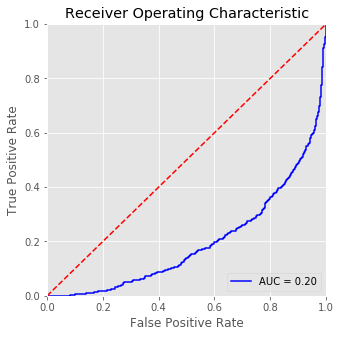

The optimal threshold for the Naive Bayes is
1.0


In [8]:
nb = MultinomialNB()
nb.fit(train_features_C, [r[1] for r in train_tweet])

predictions = nb.predict(validation_features_C) 
actual=[r[1] for r in validation_tweet]

print('Confusion matrix Count Vectorizer:') 
print(metrics.confusion_matrix(actual,predictions))

print(metrics.classification_report(actual, predictions))

nb.fit(train_features_T, [r[1] for r in train_tweet])

predictions = nb.predict(validation_features_T) 
actual=[r[1] for r in validation_tweet]

print('Confusion matrix Tfidf Vectorizer:') 
print(metrics.confusion_matrix(actual,predictions))

print(metrics.classification_report(actual, predictions))

predprobs = nb.predict_log_proba(validation_features_C)

#Graph the ROC AUC
fpr,tpr, thresholds = metrics.roc_curve([r[1] for r in validation_tweet], predprobs[:,1], pos_label=1) 
roc_auc = metrics.auc(fpr,tpr)
print("ROC AUC: {}".format(roc_auc))

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#plt.savefig('roccurve.svg')
plt.savefig('roccurve.eps')
plt.show()

# Finding the optimal threshold for Naive Bayes
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print("The optimal threshold for the Naive Bayes is")
print(optimal_threshold)

## 2.2. Logistic Regression

/Users/alex/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alex/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Confusion matrix Count Vectorizer:
[[ 97 107  30]
 [ 22 924 147]
 [  6 169 496]]
              precision    recall  f1-score   support

          -1       0.78      0.41      0.54       234
           0       0.77      0.85      0.81      1093
           1       0.74      0.74      0.74       671

    accuracy                           0.76      1998
   macro avg       0.76      0.67      0.69      1998
weighted avg       0.76      0.76      0.75      1998

Confusion matrix Tfidf Vectorizer:
[[ 38 165  31]
 [  9 926 158]
 [  0 219 452]]
              precision    recall  f1-score   support

          -1       0.81      0.16      0.27       234
           0       0.71      0.85      0.77      1093
           1       0.71      0.67      0.69       671

    accuracy                           0.71      1998
   macro avg       0.74      0.56      0.58      1998
weighted avg       0.72      0.71      0.68      1998

ROC AUC: 0.2604633559332313


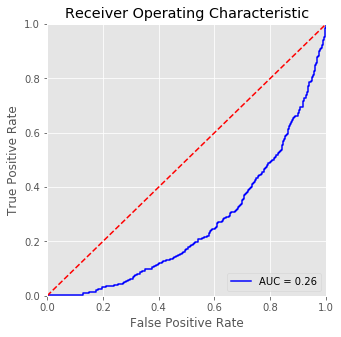

The optimal threshold for the Logistic Regression is
-9.57070672405481e-07


In [9]:
logreg = LogisticRegression()

logreg.fit(train_features_C, [r[1] for r in train_tweet])
predictions_log = logreg.predict(validation_features_C)

print('Confusion matrix Count Vectorizer:') 
print(metrics.confusion_matrix(actual,predictions_log))

print(metrics.classification_report(actual, predictions_log))

logreg.fit(train_features_T, [r[1] for r in train_tweet])
predictions_log = logreg.predict(validation_features_T)

print('Confusion matrix Tfidf Vectorizer:') 
print(metrics.confusion_matrix(actual,predictions_log))

print(metrics.classification_report(actual, predictions_log))

predprobs = logreg.predict_log_proba(validation_features_C)

#Graph the ROC AUC
fpr,tpr, thresholds = metrics.roc_curve([r[1] for r in validation_tweet], predprobs[:,1], pos_label=1) 
roc_auc = metrics.auc(fpr,tpr)
print("ROC AUC: {}".format(roc_auc))

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#plt.savefig('roccurve.svg')
plt.savefig('roccurve.eps')
plt.show()

# Finding the optimal threshold for Logistic Regression
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print("The optimal threshold for the Logistic Regression is")
print(optimal_threshold)

## 2.3. SVM

Confusion matrix Count Vectorizer:
[[126  85  23]
 [ 42 904 147]
 [ 16 159 496]]
              precision    recall  f1-score   support

          -1       0.68      0.54      0.60       234
           0       0.79      0.83      0.81      1093
           1       0.74      0.74      0.74       671

    accuracy                           0.76      1998
   macro avg       0.74      0.70      0.72      1998
weighted avg       0.76      0.76      0.76      1998

Confusion matrix Tfidf Vectorizer:
[[ 93 120  21]
 [ 25 913 155]
 [  9 170 492]]
              precision    recall  f1-score   support

          -1       0.73      0.40      0.52       234
           0       0.76      0.84      0.80      1093
           1       0.74      0.73      0.73       671

    accuracy                           0.75      1998
   macro avg       0.74      0.66      0.68      1998
weighted avg       0.75      0.75      0.74      1998



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


ROC AUC: 0.20040160958292574


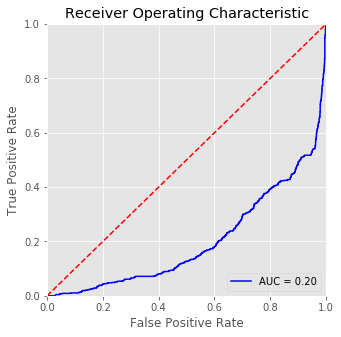

The optimal threshold for the SVM is
0.9999999499803125


In [10]:
#%% SVM
mysvm = svm.SVC(probability=True, kernel='linear')

mysvm.fit(train_features_C, [r[1] for r in train_tweet]) 

predictions_svm = mysvm.predict(validation_features_C)

print('Confusion matrix Count Vectorizer:') 
print(metrics.confusion_matrix(actual,predictions_svm))

print(metrics.classification_report(actual, predictions_svm))

mysvm.fit(train_features_T, [r[1] for r in train_tweet]) 

predictions_svm = mysvm.predict(validation_features_T)

print('Confusion matrix Tfidf Vectorizer:') 
print(metrics.confusion_matrix(actual,predictions_svm))

print(metrics.classification_report(actual, predictions_svm))

predprobs = mysvm.predict_log_proba(validation_features_C)

#Graph the ROC AUC
fpr,tpr, thresholds = metrics.roc_curve([r[1] for r in validation_tweet], predprobs[:,1], pos_label=1) 
roc_auc = metrics.auc(fpr,tpr)
print("ROC AUC: {}".format(roc_auc))

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#plt.savefig('roccurve.svg')
plt.savefig('roccurve.eps')
plt.show()

# Finding the optimal threshold for Naive Bayes
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print("The optimal threshold for the SVM is")
print(optimal_threshold)


## Final Testing Data with SVM

In [11]:
test_features_C = Cvec.transform([t[0] for t in test_tweet])

mysvm_testtweet = svm.SVC(probability=True, kernel='linear')

mysvm_testtweet.fit(train_features_C,[r[1] for r in train_tweet]) 

predictions_svm_test = mysvm_testtweet.predict(test_features_C)

actual=[t[1] for t in test_tweet]

print('Confusion matrix Count Vectorizer:') 
print(metrics.confusion_matrix(actual,predictions_svm_test))

print(metrics.classification_report(actual, predictions_svm_test))

Confusion matrix Count Vectorizer:
[[ 160  111   19]
 [  47 1154  143]
 [  28  202  633]]
              precision    recall  f1-score   support

          -1       0.68      0.55      0.61       290
           0       0.79      0.86      0.82      1344
           1       0.80      0.73      0.76       863

    accuracy                           0.78      2497
   macro avg       0.75      0.71      0.73      2497
weighted avg       0.78      0.78      0.78      2497



              precision    recall  f1-score   support

          -1       0.68      0.55      0.61       290
           0       0.79      0.86      0.82      1344
           1       0.80      0.73      0.76       863

    accuracy                           0.78      2497
   macro avg       0.75      0.71      0.73      2497
weighted avg       0.78      0.78      0.78      2497



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


ROC AUC: 0.15565950095805955


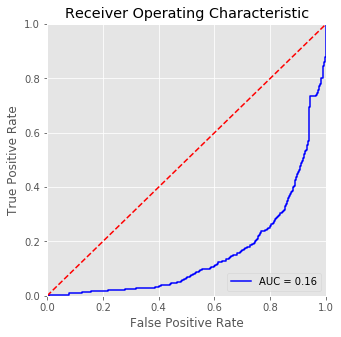

The optimal threshold for the SVM Test Data is
0.9999346619825755


In [16]:
print(metrics.classification_report(actual, predictions_svm_test))

predprobs = mysvm_testtweet.predict_log_proba(test_features_C)
predprobs

#Graph the ROC AUC
fpr,tpr, thresholds = metrics.roc_curve([r[1] for r in test_tweet], predprobs[:,1], pos_label=1) 
roc_auc = metrics.auc(fpr,tpr)
print("ROC AUC: {}".format(roc_auc))

plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b',label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

#plt.savefig('roccurve.svg')
plt.savefig('roccurve.eps')
plt.show()

# Finding the optimal threshold for SVM
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print("The optimal threshold for the SVM Test Data is")
print(optimal_threshold)

In [17]:
for f, t, th in zip(fpr,tpr, thresholds):
    print('{}\t{}\t{}'.format(f,t,th))

0.0	0.0	0.9999346619825755
0.0006119951040391676	0.0	-6.533801742443574e-05
0.00795593635250918	0.0	-0.028400005901494253
0.00795593635250918	0.002317497103128621	-0.03202941588582045
0.023255813953488372	0.002317497103128621	-0.052965660619475025
0.023255813953488372	0.0034762456546929316	-0.05385670610579294
0.025091799265605876	0.0034762456546929316	-0.05780223580363174
0.025091799265605876	0.004634994206257242	-0.05809815029141239
0.02876376988984088	0.004634994206257242	-0.06310455637552301
0.029987760097919217	0.004634994206257242	-0.0631100952950897
0.031211750305997554	0.004634994206257242	-0.06342892981069602
0.0740514075887393	0.004634994206257242	-0.06346135051574806
0.07711138310893513	0.004634994206257242	-0.06716135733518722
0.07711138310893513	0.005793742757821553	-0.06725749077049357
0.07833537331701346	0.005793742757821553	-0.06837809939721186
0.07894736842105263	0.005793742757821553	-0.06925415097315314
0.07894736842105263	0.006952491309385863	-0.06949459824669607
0.0

In [18]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold_svm = thresholds[optimal_idx]
print('Optimal Threshold')
print(optimal_threshold_svm)
np.exp(optimal_threshold_svm)

Optimal Threshold
0.9999346619825755


2.718104227115696

In [19]:
print('WITH THRESHOLD OF {}'.format(np.exp(optimal_threshold_svm)))
print('-'*60)
print('Confusion Matrix:') 
print(metrics.confusion_matrix(actual,predictions_svm_test))

print(metrics.classification_report(actual, predictions_svm_test))

WITH THRESHOLD OF 2.718104227115696
------------------------------------------------------------
Confusion Matrix:
[[ 160  111   19]
 [  47 1154  143]
 [  28  202  633]]
              precision    recall  f1-score   support

          -1       0.68      0.55      0.61       290
           0       0.79      0.86      0.82      1344
           1       0.80      0.73      0.76       863

    accuracy                           0.78      2497
   macro avg       0.75      0.71      0.73      2497
weighted avg       0.78      0.78      0.78      2497



In [20]:
## Saving the Vectorizer and Classifier

In [22]:
import pickle
from sklearn.externals import joblib

pickle.dump(test_features_C,open("myvectorizer.pkl",mode='wb'))
joblib.dump(mysvm_testtweet,'svmclassifier.pkl')

['svmclassifier.pkl']

# 3. Correlation with Stock Data

Load Disney Stock Data from 13-22 May 2020

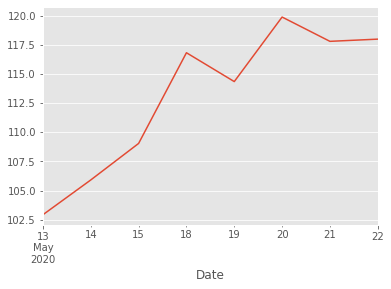

In [23]:
start = dt.datetime(2020,5,13)
end = dt.datetime(2020,5,22)

dis = web.DataReader("DIS", "yahoo", start, end)
dis.to_csv("disney_stock.csv") #Saving Stock Data as CSV

dis["Close"].plot()

Randomly select 1000 cases per day, aggregate the Sentiment data by day and graph it.

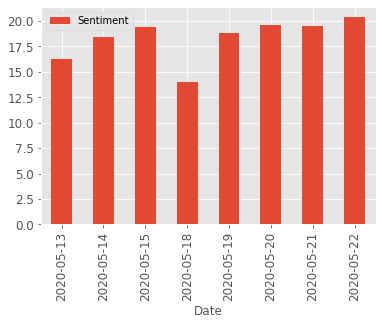

In [24]:
disney_alltweets = pd.read_csv ('/Users/alex/Documents/UvA/Masters/BigData/Big Data Project/twitter_metadata/export_dataframe.csv')
disney_alltweets['Sentiment'] = sentilist #Append Sentiment to Dataframe

disney_alltweets= disney_alltweets.groupby('Date').apply(lambda x: x.sample(1000)).reset_index(drop=True) #Select 1000 observations per day

sentiment_day=disney_alltweets.groupby(by=['Date']).sum()
sentiment_day.head(10)
sentiment_day.plot(kind='bar', legend=True, fontsize=12)

First we merge the stock data with the Sentiment List per day. Then we run a correlation between Stock Data Closing and Sentiment Level of tweets per day, visualized by a Heatmap.

In [25]:
twitter_stock = dis.join(sentiment_day,how='left').fillna(0)
twitter_stock.head(10)

High         Low        Open       Close    Volume  \
Date                                                                   
2020-05-13  104.540001  101.599998  104.500000  102.919998  21085800   
2020-05-14  105.919998   99.660004  101.980003  105.910004  22002200   
2020-05-15  109.379997  104.269997  104.980003  109.050003  29766000   
2020-05-18  119.779999  114.470001  114.470001  116.849998  40075700   
2020-05-19  116.470001  113.419998  115.099998  114.370003  20332600   
2020-05-20  120.870003  116.040001  116.419998  119.919998  25749900   
2020-05-21  120.300003  116.500000  119.339996  117.830002  17578300   
2020-05-22  118.570000  116.830002  117.500000  118.019997   9288200   

             Adj Close  Sentiment  
Date                               
2020-05-13  102.919998  16.271503  
2020-05-14  105.910004  18.470813  
2020-05-15  109.050003  19.393121  
2020-05-18  116.849998  13.961477  
2020-05-19  114.370003  18.777735  
2020-05-20  119.919998  19.621998  
2020-05-21  117.830002  19.550093  
2020-05-22  118.019997  20.361486

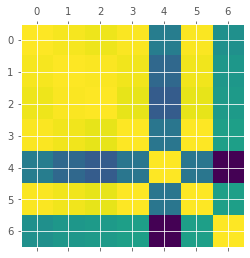

In [26]:
Correlation = twitter_stock['Close'].corr(twitter_stock['Sentiment'])
plt.matshow(twitter_stock.corr())
plt.show()

In [27]:
import scipy.stats
a = twitter_stock['Close']
b = twitter_stock['Sentiment']
pearsonsr = scipy.stats.pearsonr(a, b)
print (pearsonsr) 

print('There appears to be no meaningful correlation between Stock Closing price and Sentiment of Twitter Data:', pearsonsr)

(0.257781549347498, 0.5376451376996418)
There appears to be no meaningful correlation between Stock Closing price and Sentiment of Twitter Data: (0.257781549347498, 0.5376451376996418)
